In [1]:
from scipy.io.wavfile import read as wav_read
import numpy as np
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt
import math
import subprocess as sp

%matplotlib inline

In [2]:
from warnings import warn

In [3]:
# rate, wave = wav_read('sound.wav')
rate, wave = wav_read('28042__bcjordan__voicedownbew.wav')

def filename_key(filename):
    let = ord(filename[0]) - ord('a')
    num = ord(filename[1]) - ord('0')
    b = 1 if filename[2] == 's' else 0
    return num * 1000 + let * 10 + b

files = ['c3s.ogg', 'f1.ogg', 'f3s.ogg', 'a4s.ogg', 'g2s.ogg', 'd2.ogg', 'e2.ogg', 'd3.ogg', 'a4.ogg', 
         'd3s.ogg', 'f3.ogg', 'a2s.ogg', 'a3s.ogg', 'b3.ogg', 'f1s.ogg', 'g1s.ogg', 'e3.ogg', 'b2.ogg',
         'g3.ogg', 'c3.ogg', 'f2s.ogg', 'g3s.ogg', 'g1.ogg', 'a3.ogg', 'd2s.ogg', 'a2.ogg', 'g2.ogg', 
         'c2s.ogg', 'b4.ogg', 'c2.ogg', 'f2.ogg']
files.sort(key=filename_key)

FileNotFoundError: [Errno 2] No such file or directory: '28042__bcjordan__voicedownbew.wav'

In [4]:
cnt = 100

In [5]:
def run_ps(*args):
    sp.run(args, check=True)

In [6]:
def show(ys):
    ts = np.arange(ys.shape[0])
    plt.figure(figsize=(15, 6))
    plt.plot(ts, ys)

In [7]:
def get_pitch(wave, pos):
    # print(wave.shape, pos)
    wave = wave[pos:]
    wave = wave[:int(length / cnt * rate)]
    # wave = np.hamming(wave.shape[0]) * wave
    
    nwave = np.zeros(shape=wave.shape[0] * 2)
    nwave[:wave.shape[0]] = wave
    window = np.flipud(nwave)
    
    corr = ifft(fft(nwave) * fft(window)).real
    n = corr.shape[0]
    corr = np.roll(corr, n)[:n]
    
    # show(corr)
    # plt.show()
    
    corr = corr[:corr.shape[0] // 2]
    diff = np.diff(corr)
    maxs = np.argwhere(np.logical_and(diff[:-1] > 0, diff[1:] < 0)).squeeze()
    maxs = maxs[np.argwhere(corr[maxs] > 0.95 * corr[maxs].max()).squeeze()]
    # print(maxs)
    if len(maxs.shape) == 0:
        ind = int(maxs)
    else:
        ind = maxs[0]
    
    # print(ind)
    if ind == 1:
        show(corr)
    return rate / (ind + 2), rate / ind

In [8]:
res = []
for pos in np.arange(10 / cnt, 11 / cnt, 1 / cnt):
    print('pos', pos, pos * rate)
    res.append(get_pitch(wave, int(pos * rate)))
print(res)

NameError: name 'rate' is not defined

In [139]:
def determine(left, right):
    base = 440
    i1 = math.log(left / base) / math.log(2) * 12
    i2 = math.log(right / base) / math.log(2) * 12
    i1 = math.ceil(i1)
    i2 = math.floor(i2)
    if i1 == i2:
        return i1
    else:
        warn("choose between {}, {}".format(i1, i2))
        return i1

In [80]:
determine(*res[0])

2

In [161]:
for filename in files:
    run_ps('ffmpeg', '-i', './piano_sound/' + filename, '-y', 'out.wav')
    rate, wave = wav_read('out.wav')
    length = wave.shape[0] / rate
    res = []
    for pos in np.arange(10 / cnt, 11 / cnt, 1 / cnt):
        # print('pos', pos, pos * rate)
        pitch = get_pitch(wave, int(pos * rate))
        det = determine(*pitch)
        print(pitch, det)
        res.append(det)

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:10: UserWarning: choose between -15, -16
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:10: UserWarning: choose between -14, -15
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:10: UserWarning: choose between -13, -14
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:10: UserWarning: choose between -12, -13
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:10: UserWarning: choose between -11, -12


(177.82258064516128, 180.7377049180328) -15
(188.46153846153845, 191.7391304347826) -14
(198.64864864864865, 202.29357798165137) -13
(210.0, 214.07766990291262) -12
(222.72727272727272, 227.31958762886597) -11


/usr/lib/python3.6/site-packages/ipykernel/__main__.py:10: UserWarning: choose between -10, -11
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:10: UserWarning: choose between -9, -10
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:10: UserWarning: choose between -8, -9
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:10: UserWarning: choose between -7, -8
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:10: UserWarning: choose between -6, -7
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:10: UserWarning: choose between -5, -6


(237.09677419354838, 242.30769230769232) -10
(250.5681818181818, 256.3953488372093) -9
(265.66265060240966, 272.22222222222223) -8
(279.11392405063293, 286.3636363636364) -7
(297.97297297297297, 306.25) -6
(315.0, 324.2647058823529) -5


/usr/lib/python3.6/site-packages/ipykernel/__main__.py:10: UserWarning: choose between -4, -5
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:10: UserWarning: choose between -3, -4
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:10: UserWarning: choose between -2, -3


(334.09090909090907, 344.53125) -4
(355.64516129032256, 367.5) -3
(373.728813559322, 386.8421052631579) -2
(400.90909090909093, 416.0377358490566) -1
(424.03846153846155, 441.0) 0
(450.0, 469.1489361702128) 

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:10: UserWarning: choose between 2, 1
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:10: UserWarning: choose between 4, 3


1
(469.1489361702128, 490.0) 2
(501.1363636363636, 525.0) 3
(525.0, 551.25) 4
(565.3846153846154, 595.9459459459459) 5
(595.9459459459459, 630.0) 6
(630.0, 668.1818181818181) 7
(668.1818181818181, 711.2903225806451) 8
(711.2903225806451, 760.3448275862069) 9
(735.0, 787.5) 9
(787.5, 848.0769230769231) 11
(848.07692307692309, 918.75) 12
(882.0, 958.695652173913) 13
(958.695652173913, 1050.0) 14
(1002.2727272727273, 1102.5) 15


/usr/lib/python3.6/site-packages/ipykernel/__main__.py:10: UserWarning: choose between 9, 10
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:10: UserWarning: choose between 14, 15


In [164]:
from tqdm import tqdm

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:10: UserWarning: choose between 25, 26
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:10: UserWarning: choose between 47, 51
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:10: UserWarning: choose between 49, 55
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:10: UserWarning: choose between 56, 67
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:10: UserWarning: choose between 61, 79
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:10: UserWarning: choose between -19, -20
/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:10: UserWarning

ValueError: Invalid number of FFT data points (0) specified.

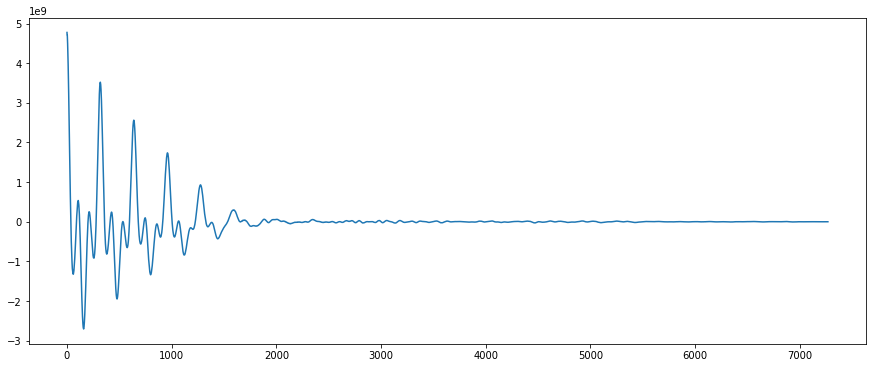

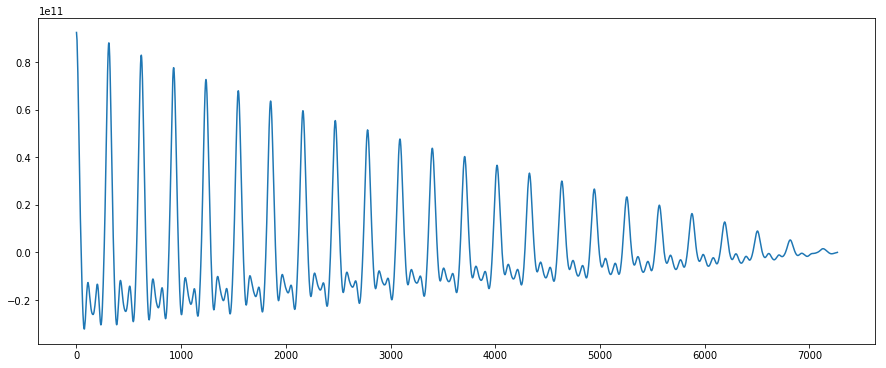

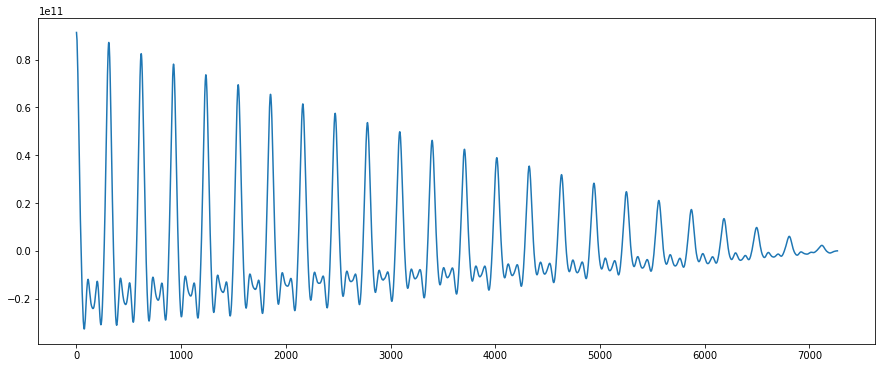

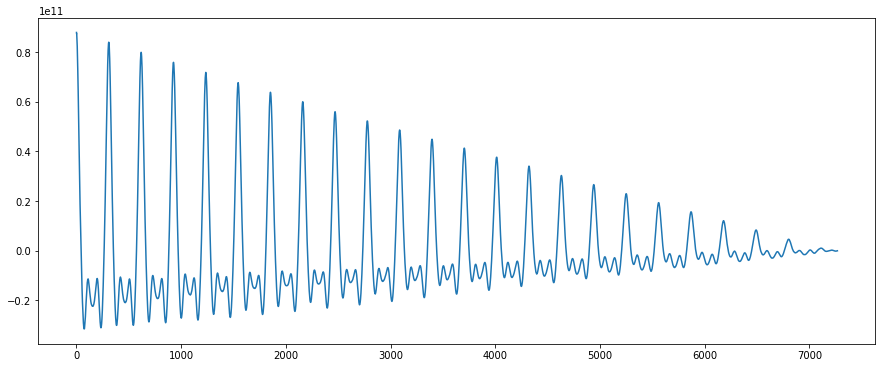

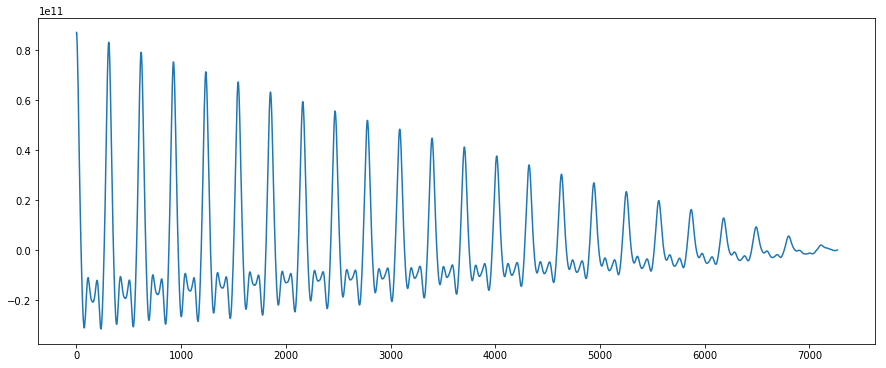

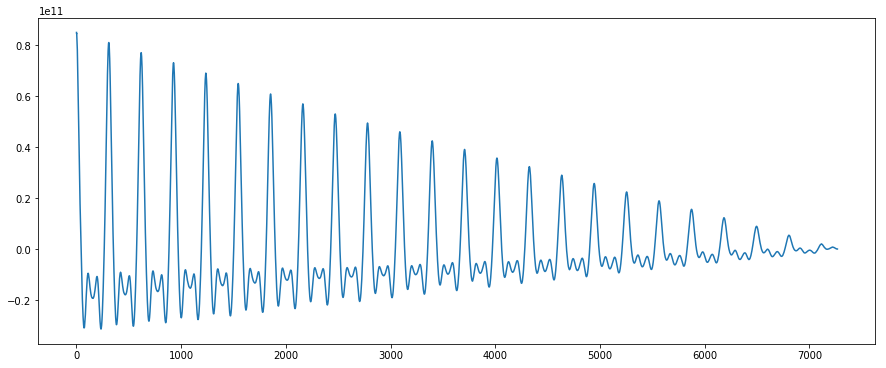

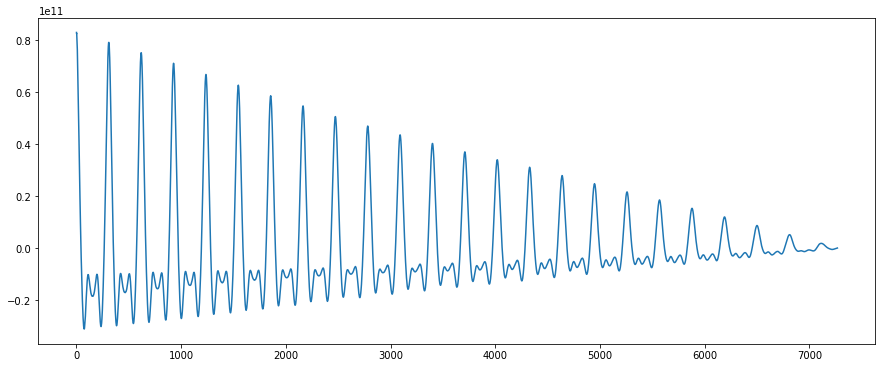

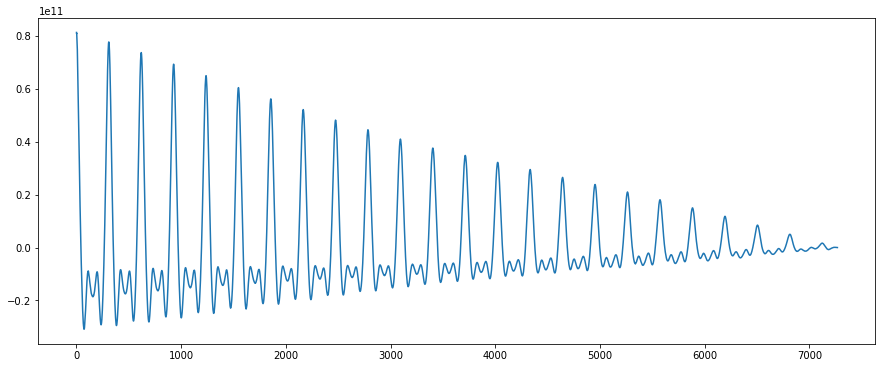

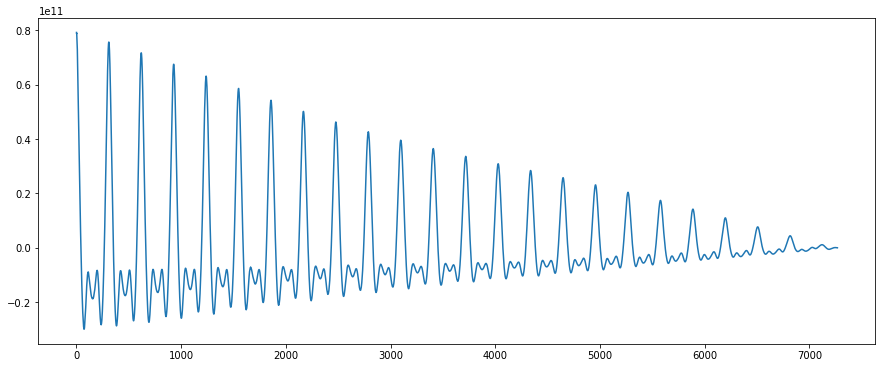

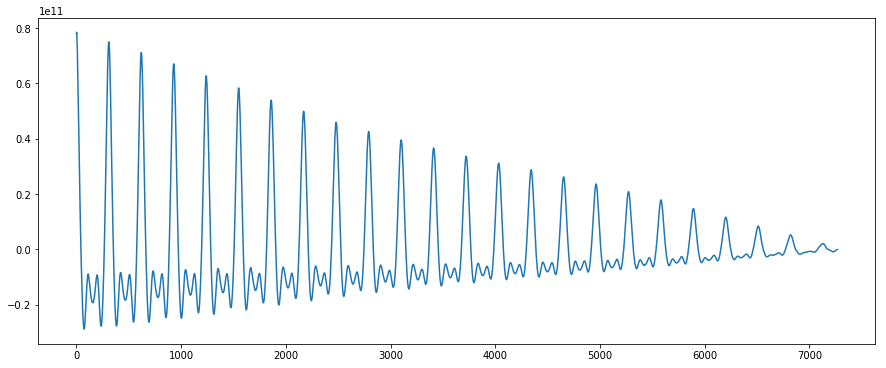

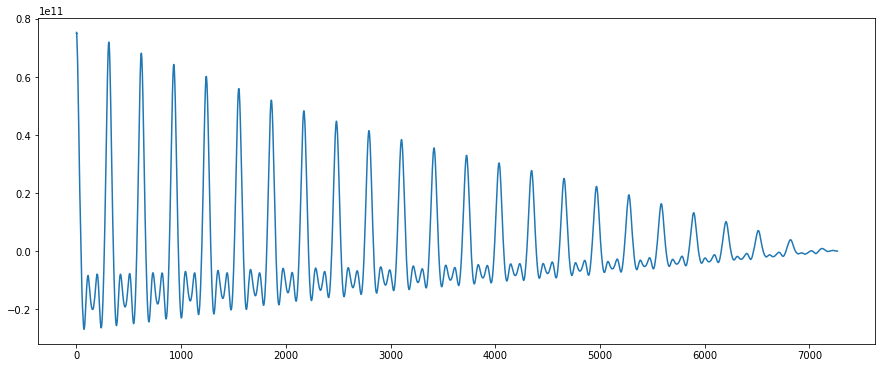

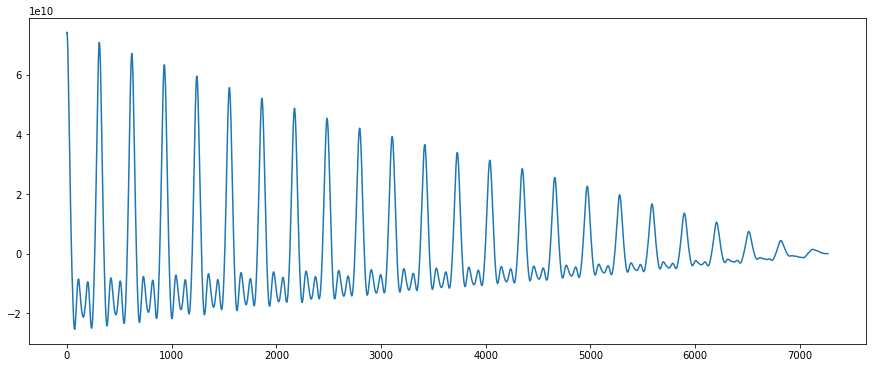

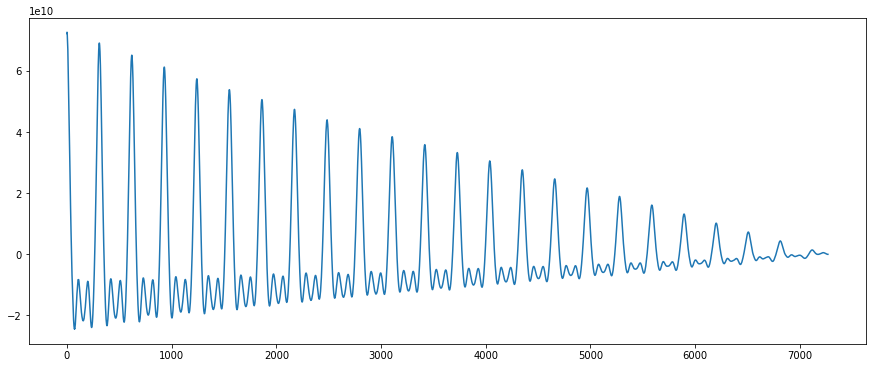

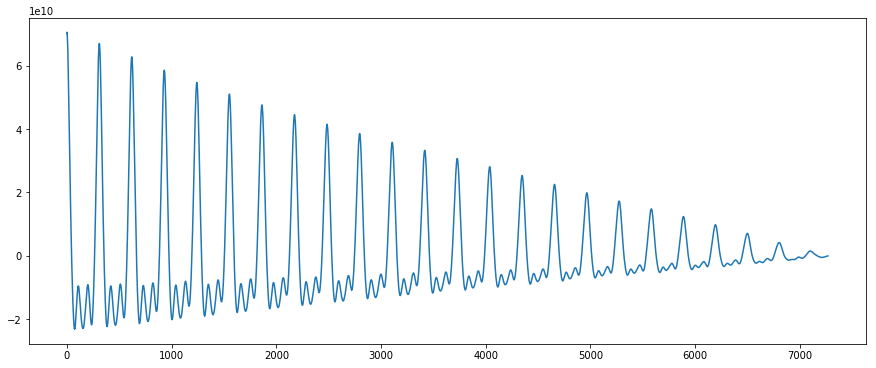

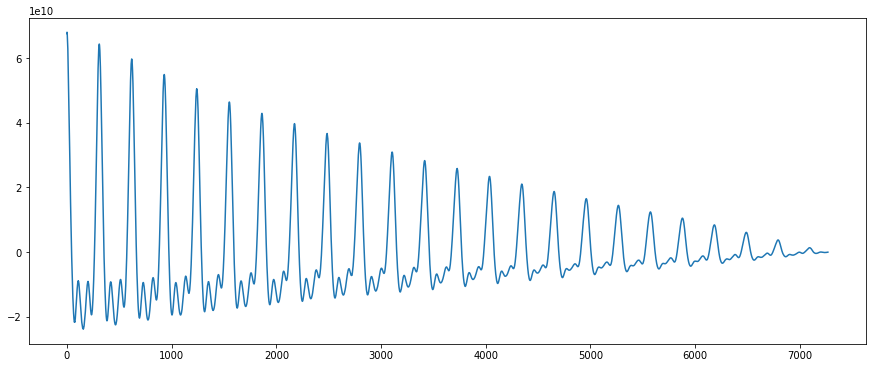

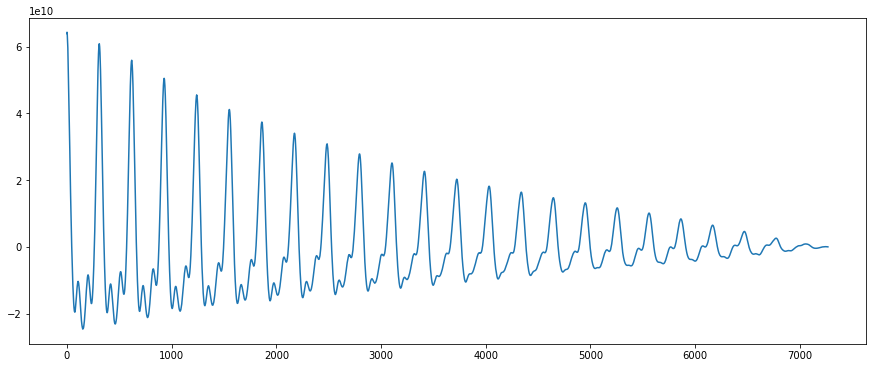

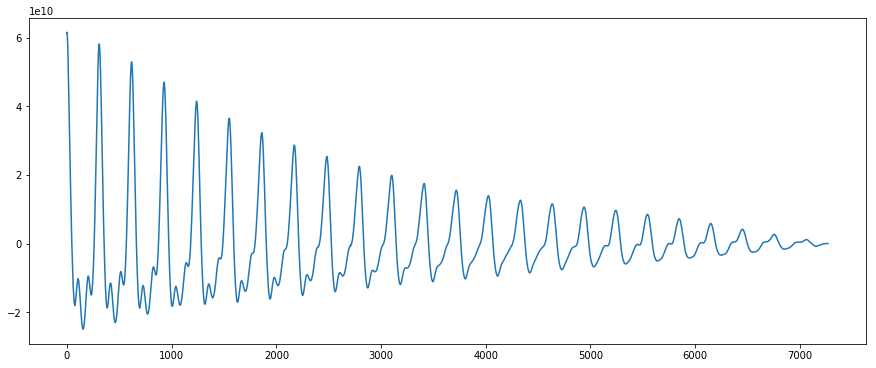

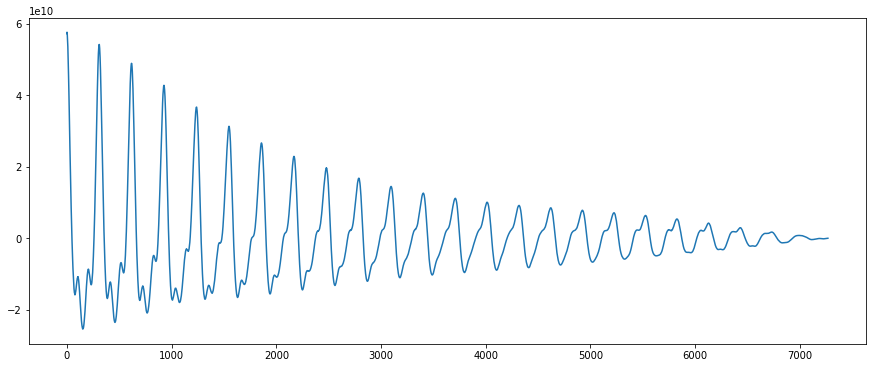

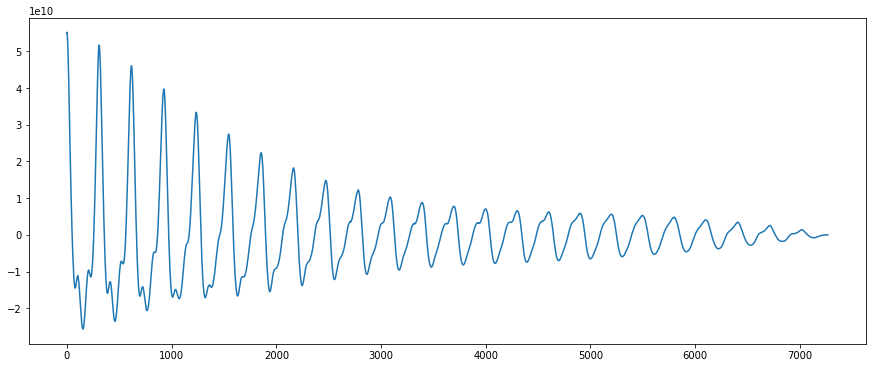

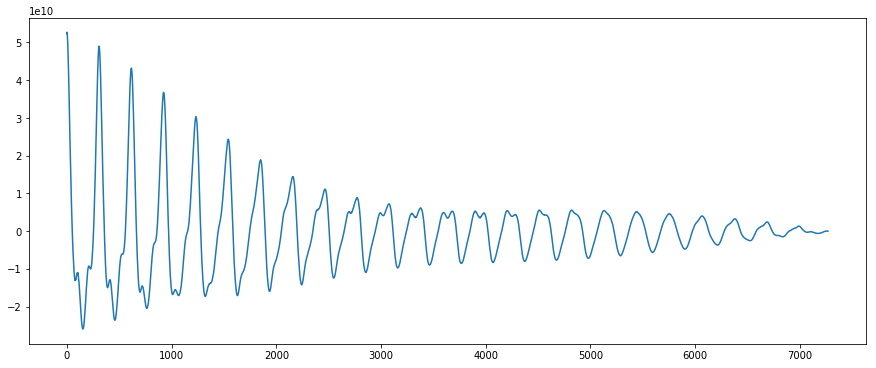

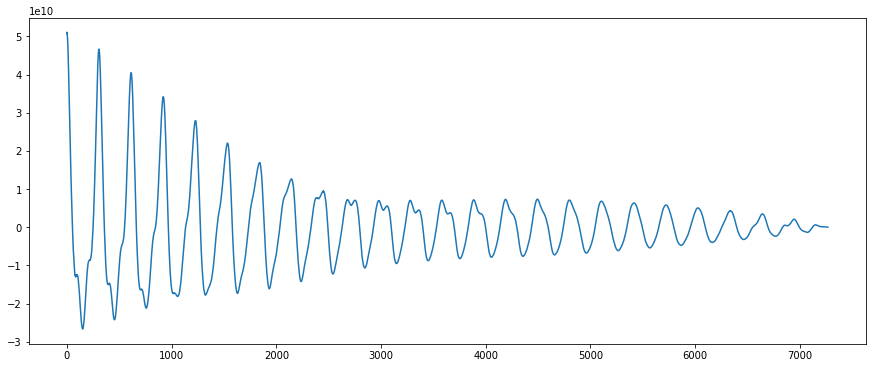

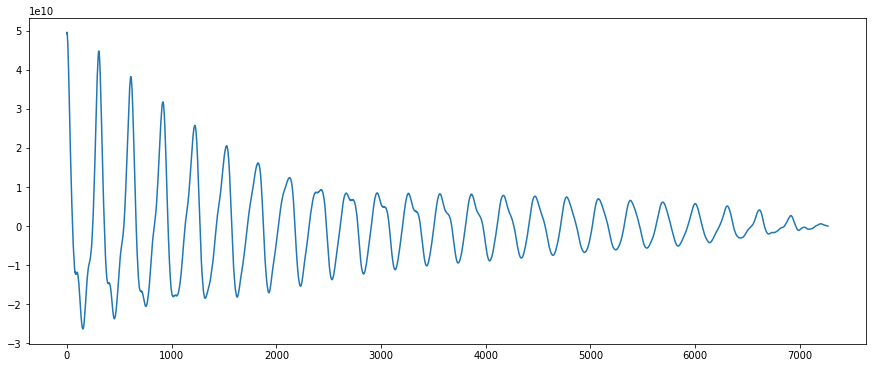

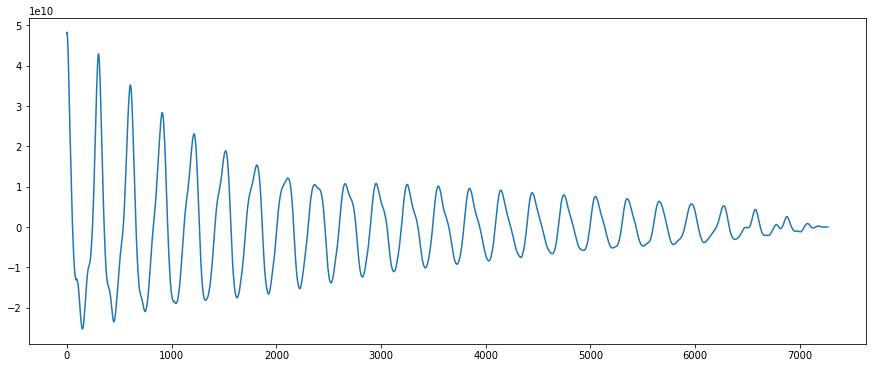

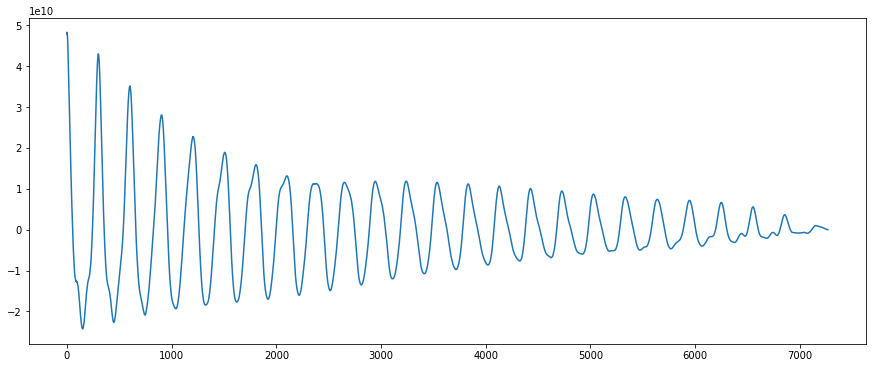

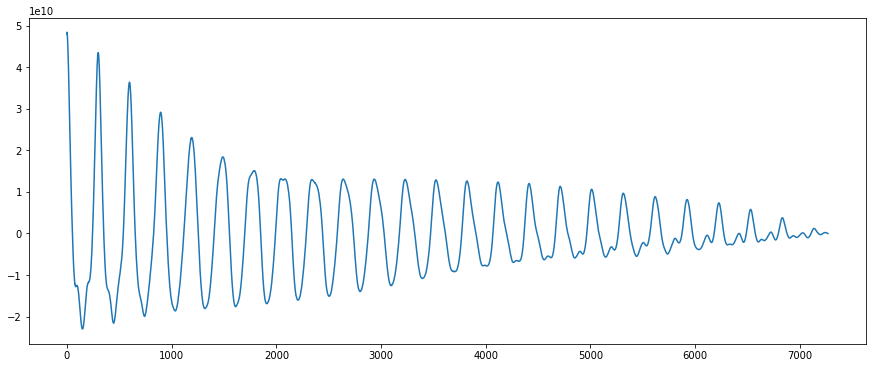

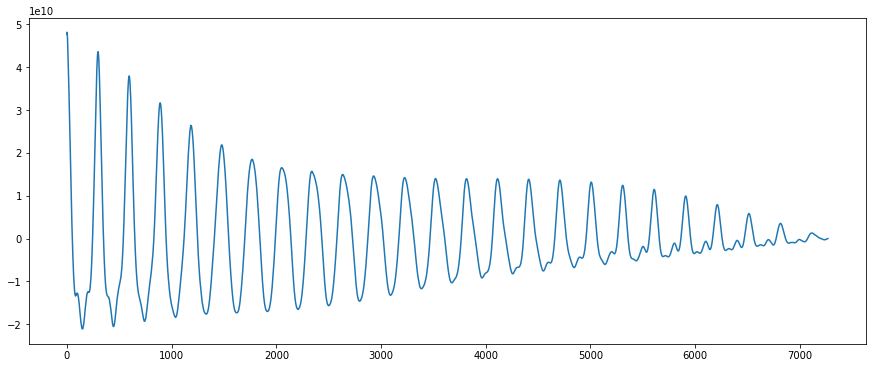

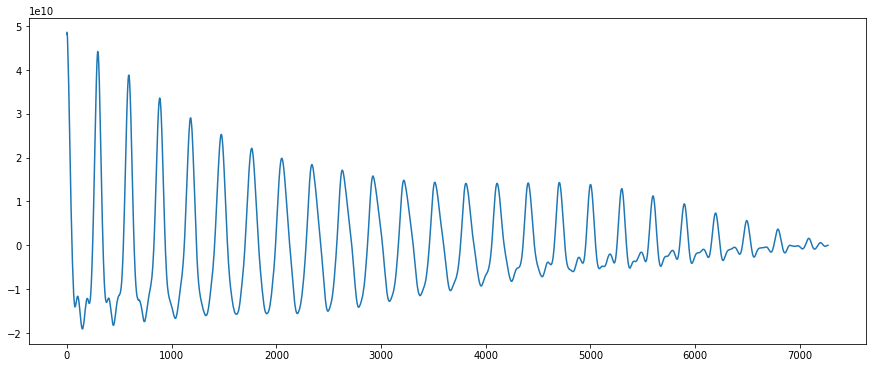

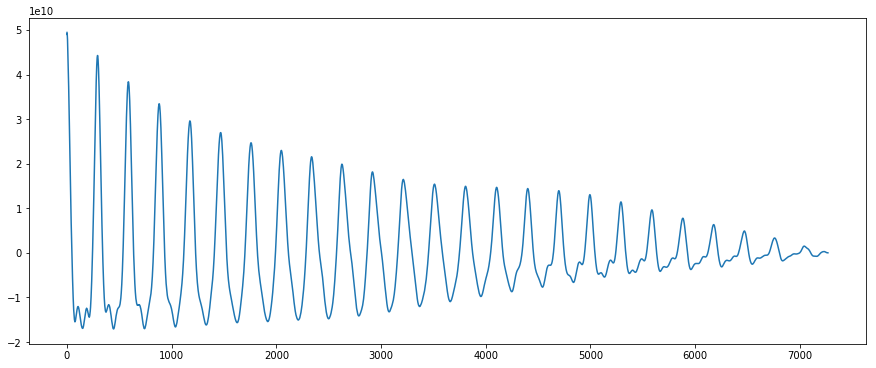

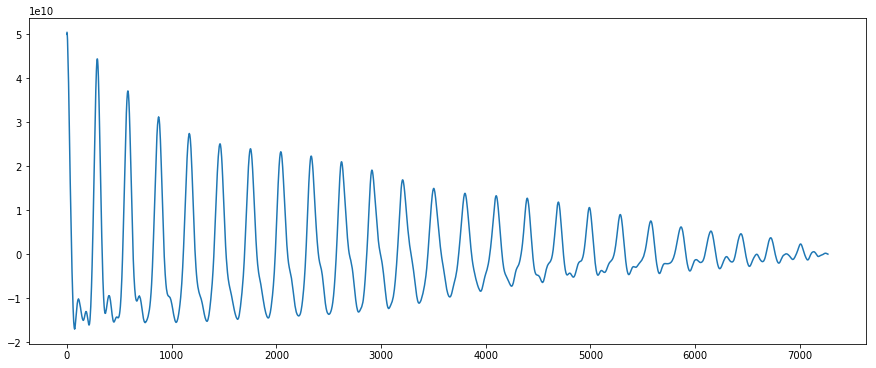

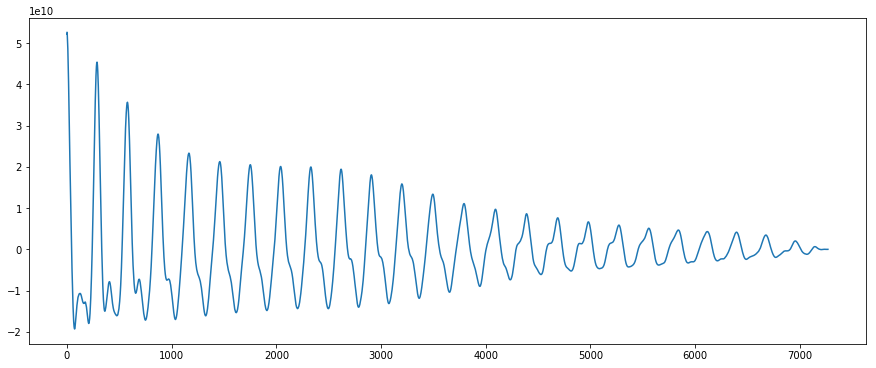

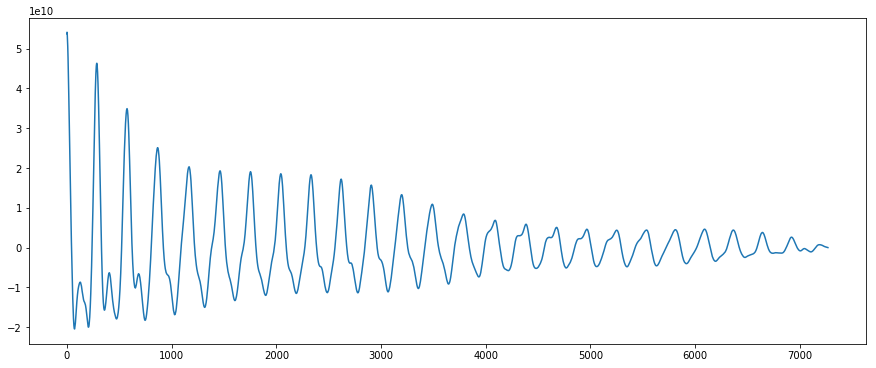

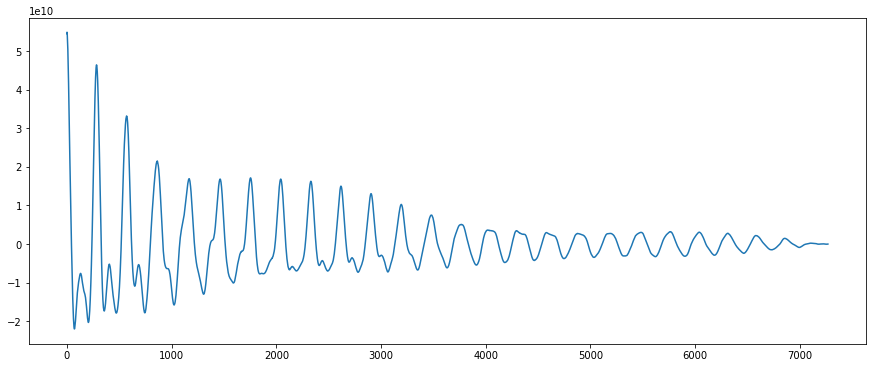

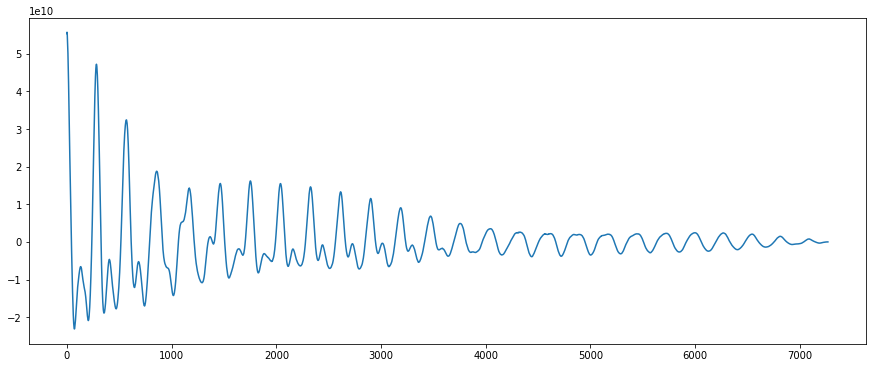

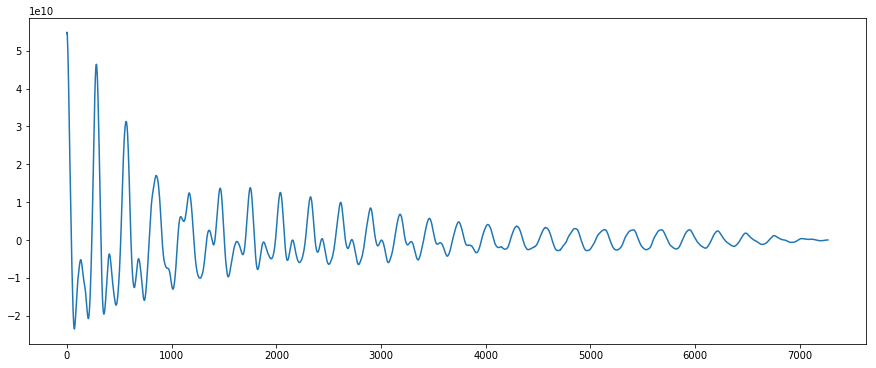

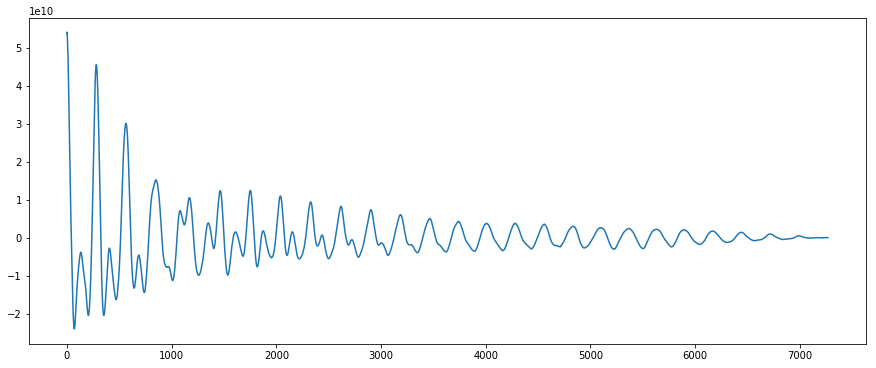

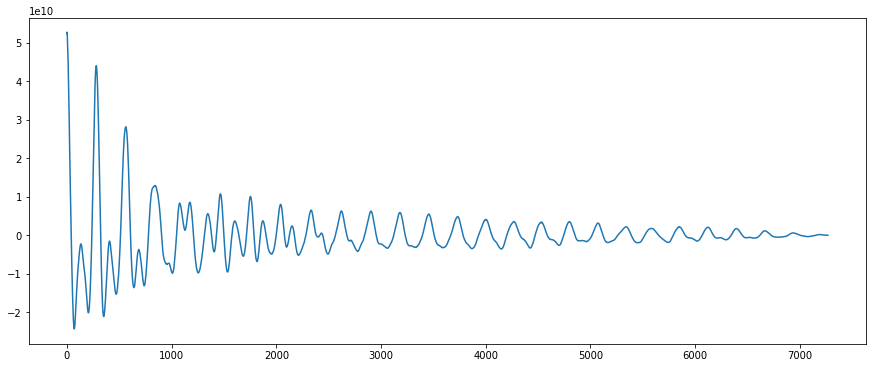

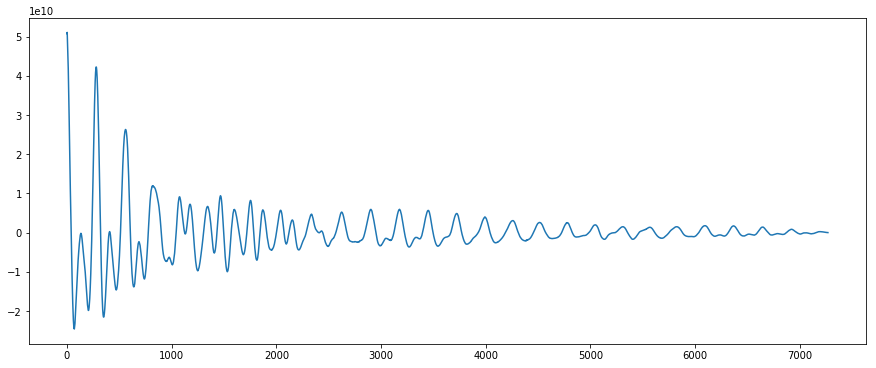

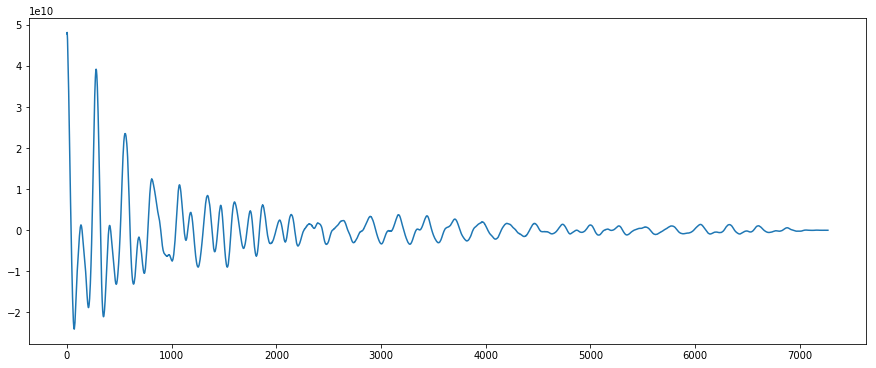

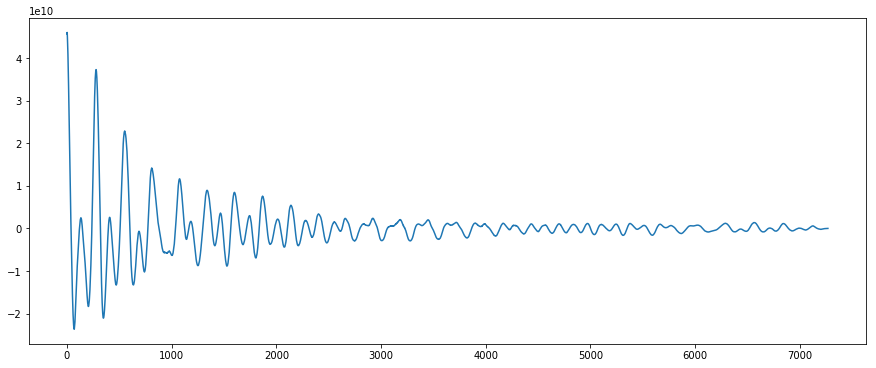

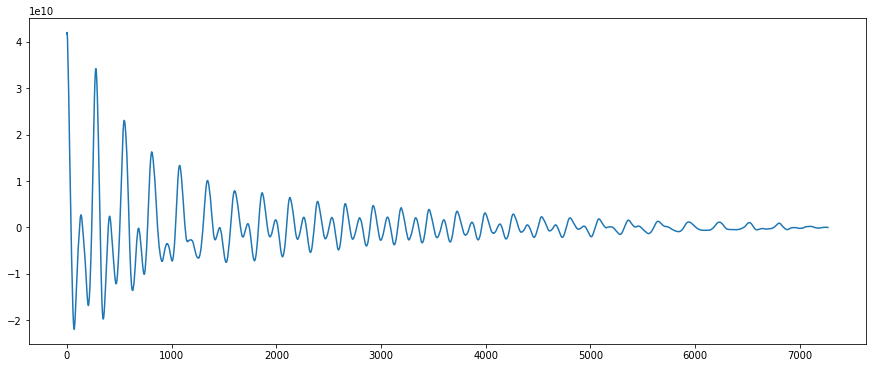

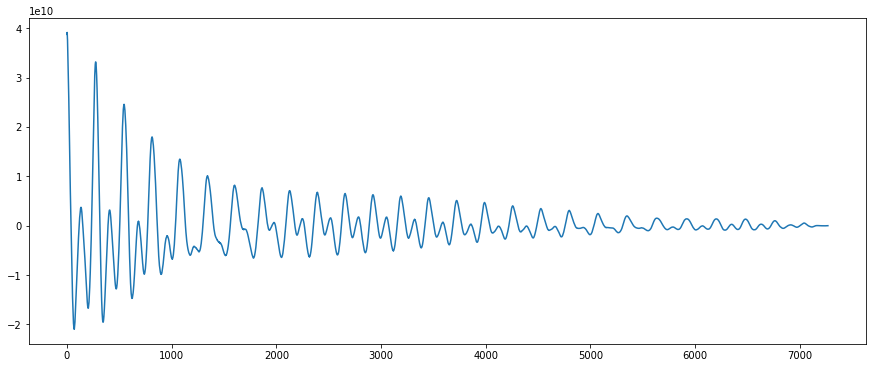

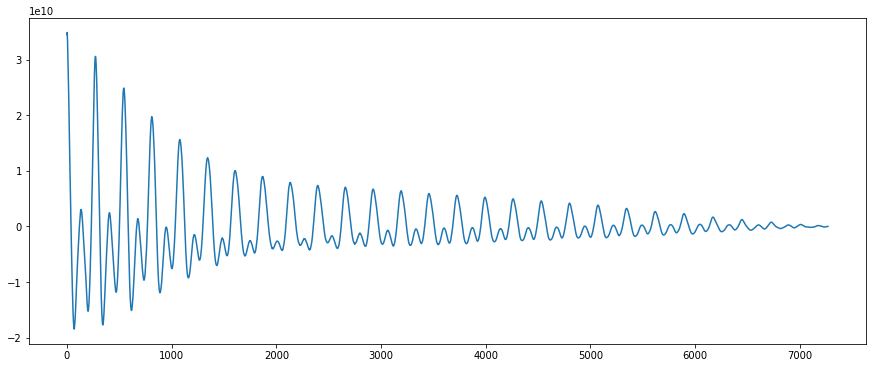

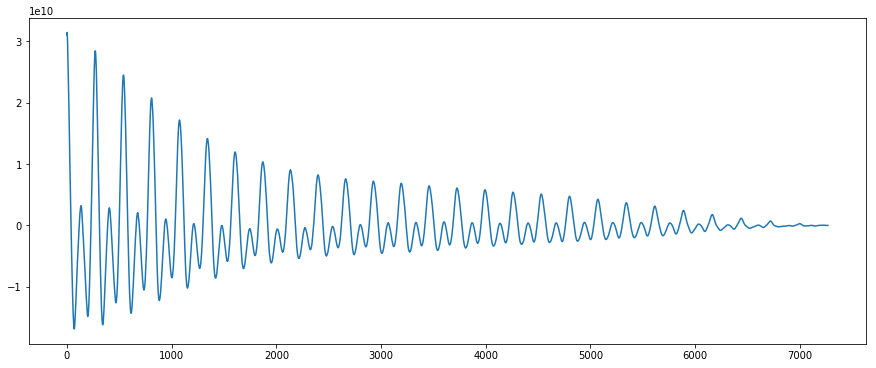

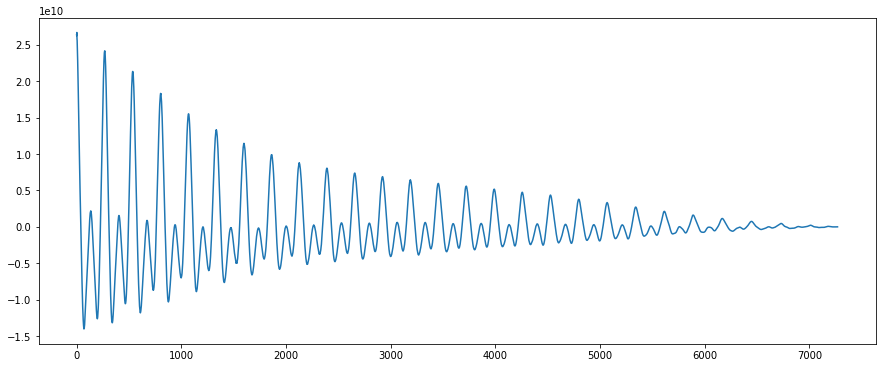

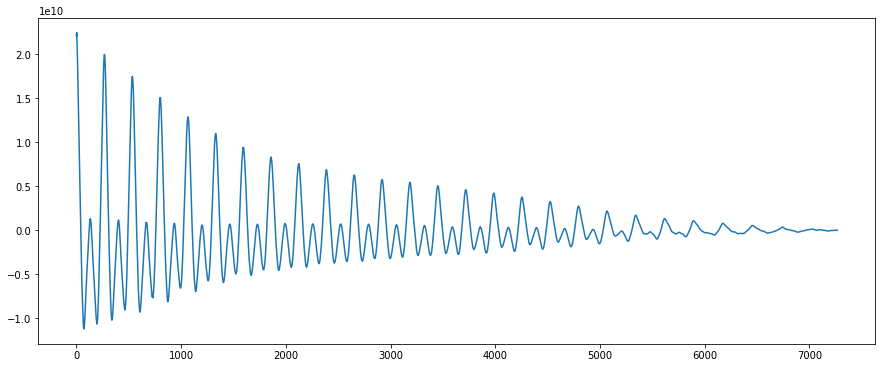

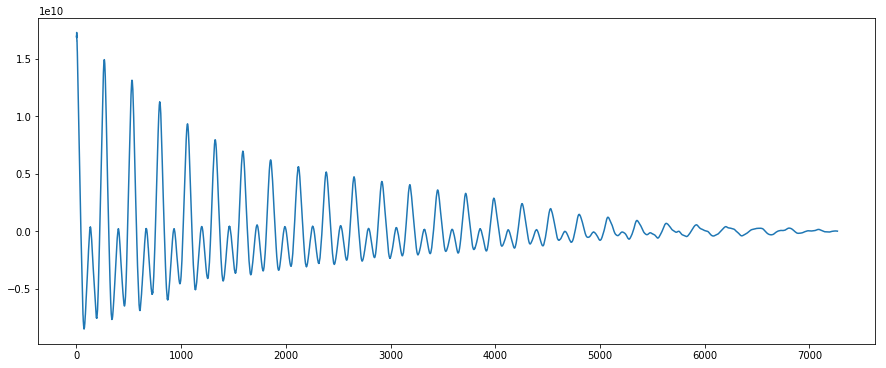

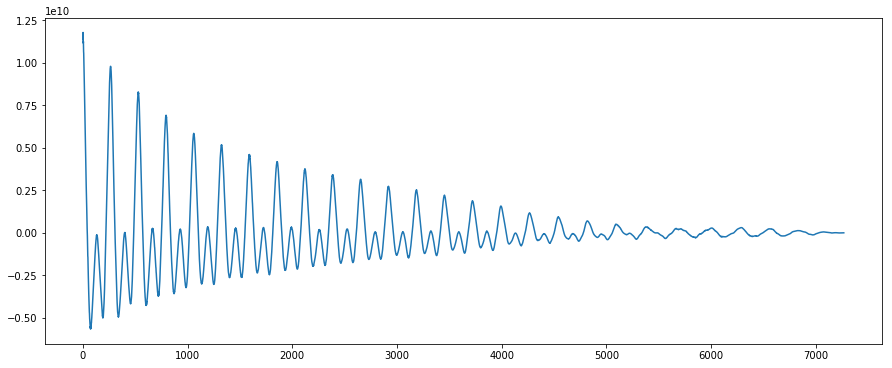

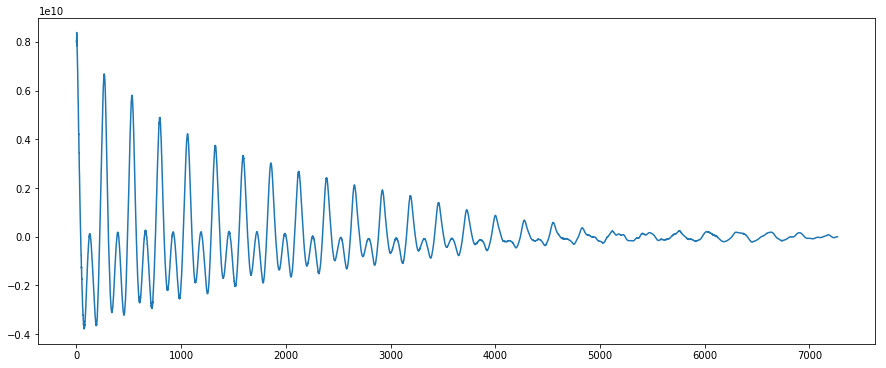

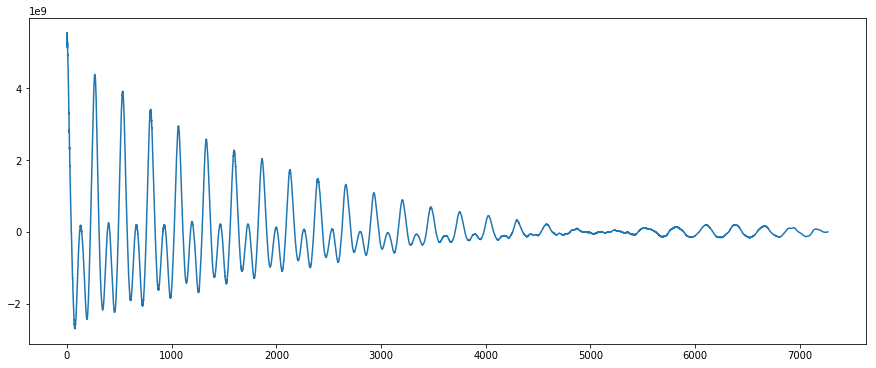

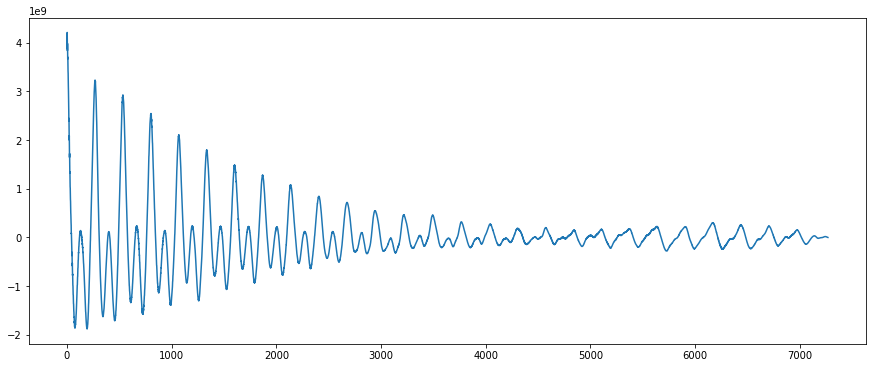

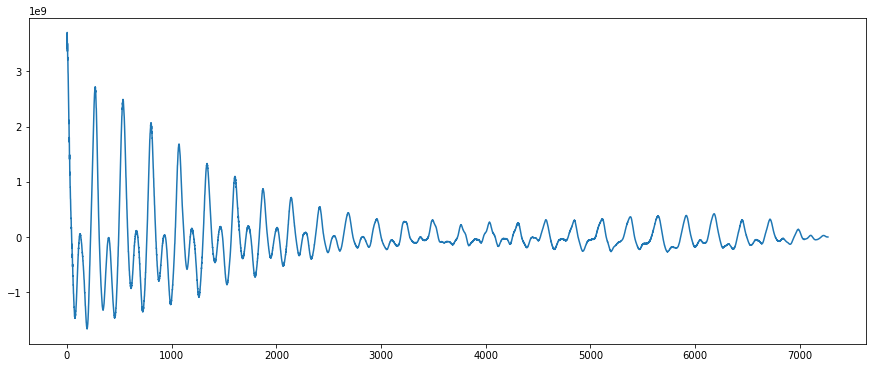

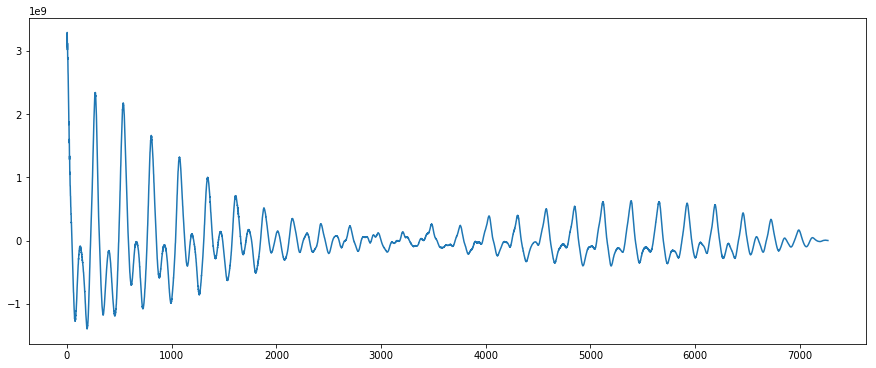

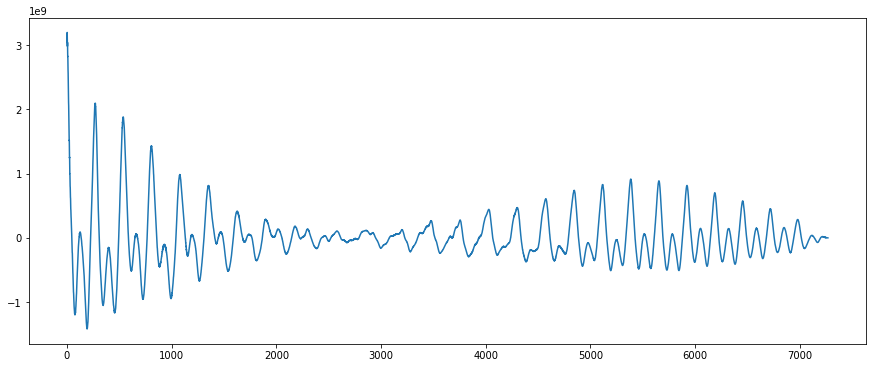

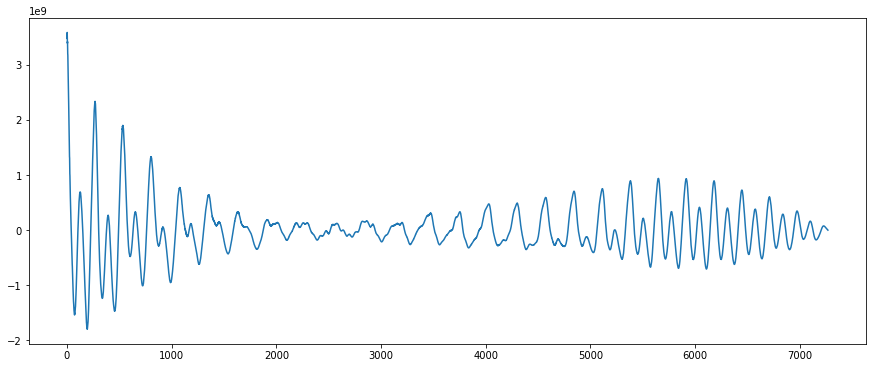

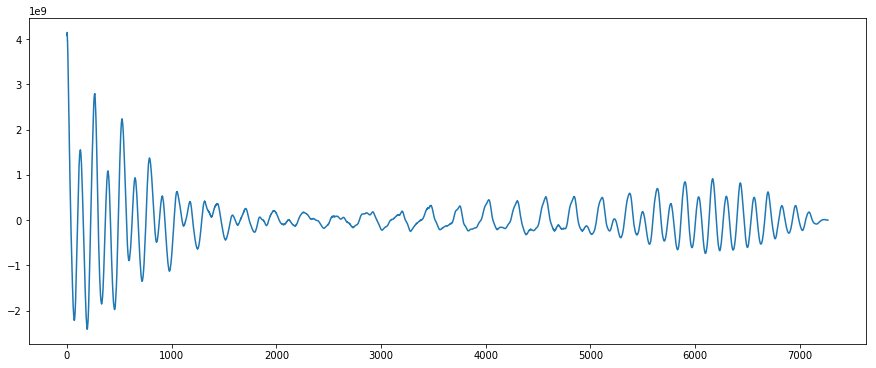

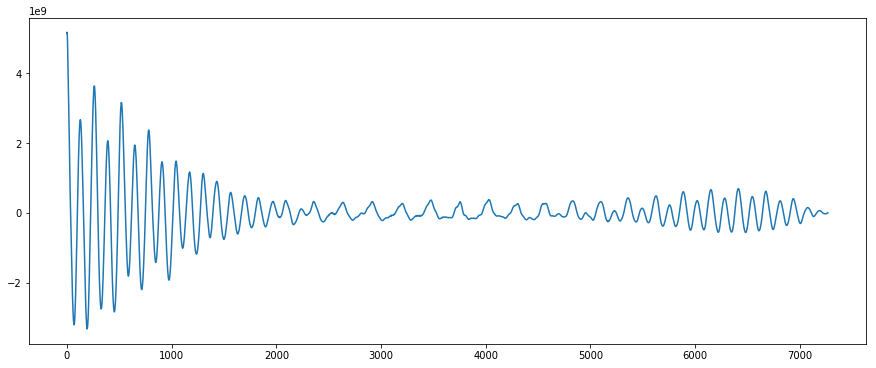

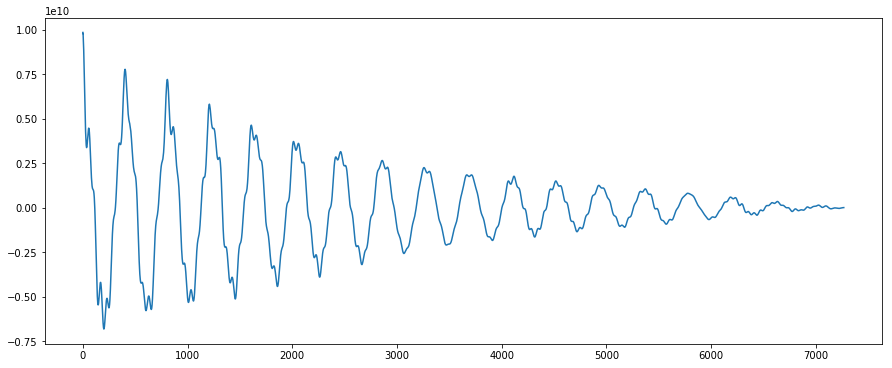

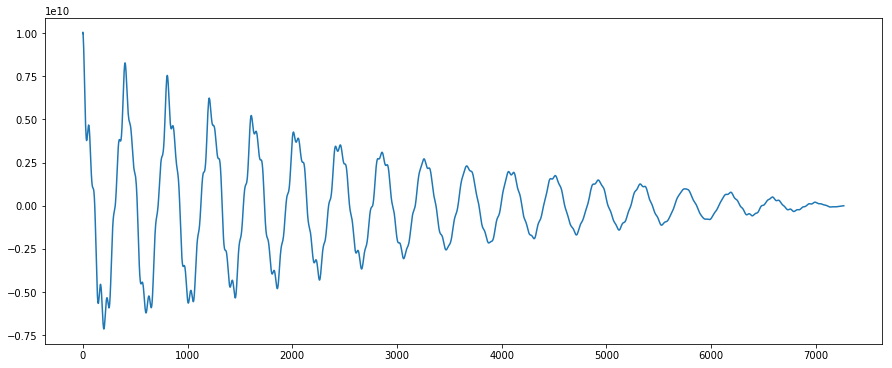

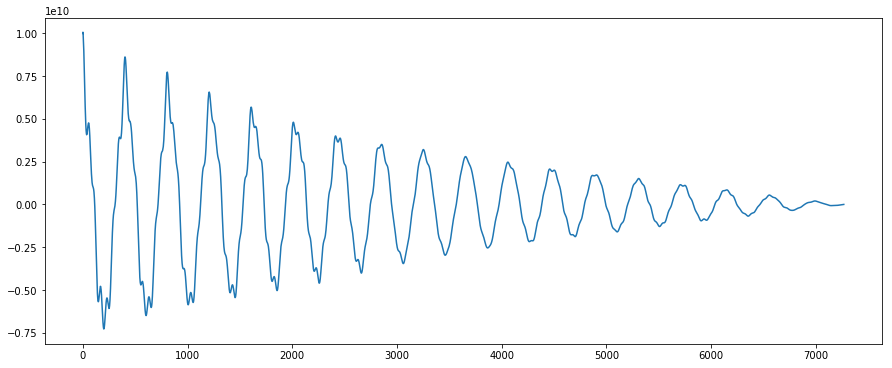

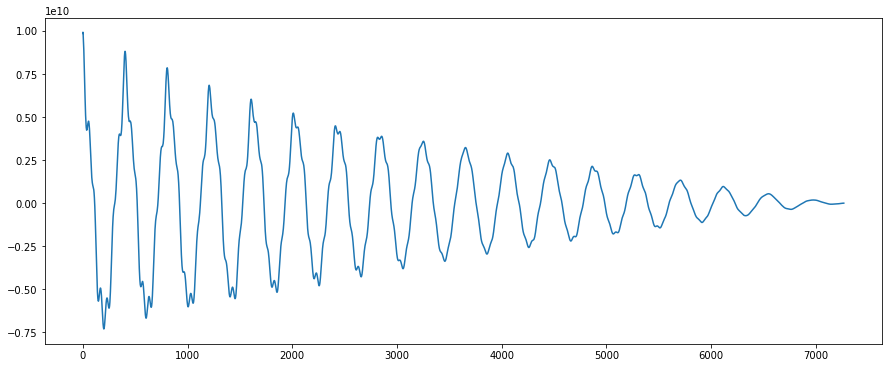

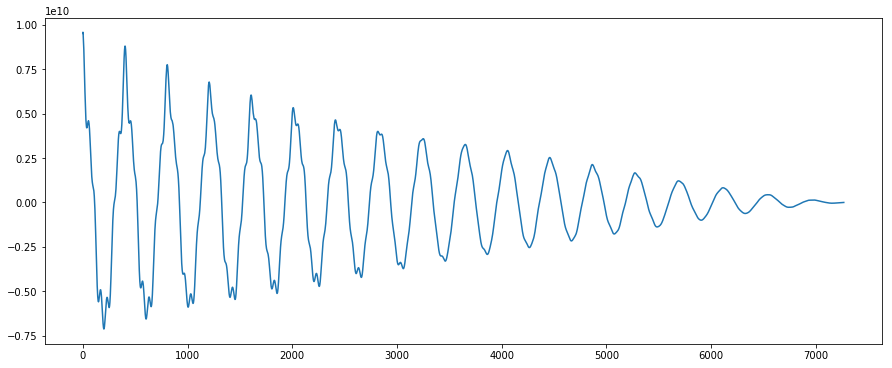

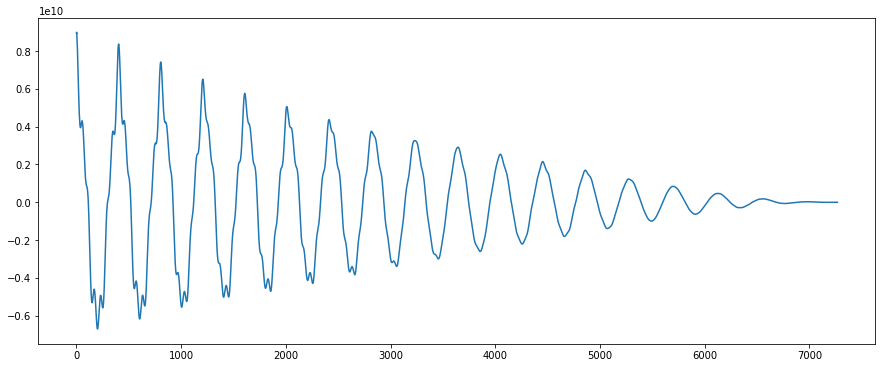

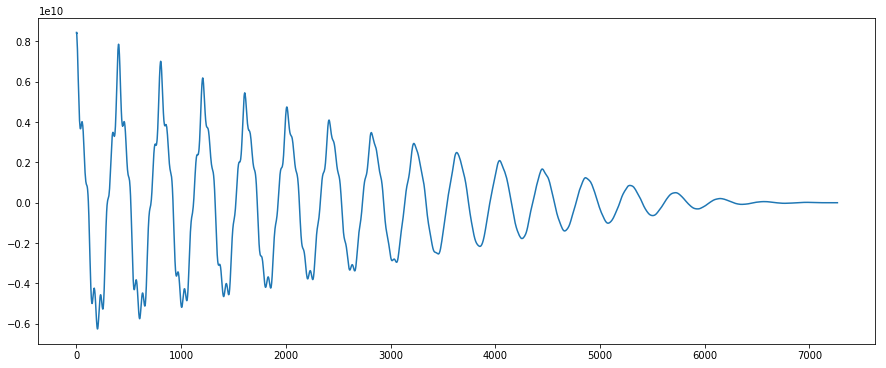

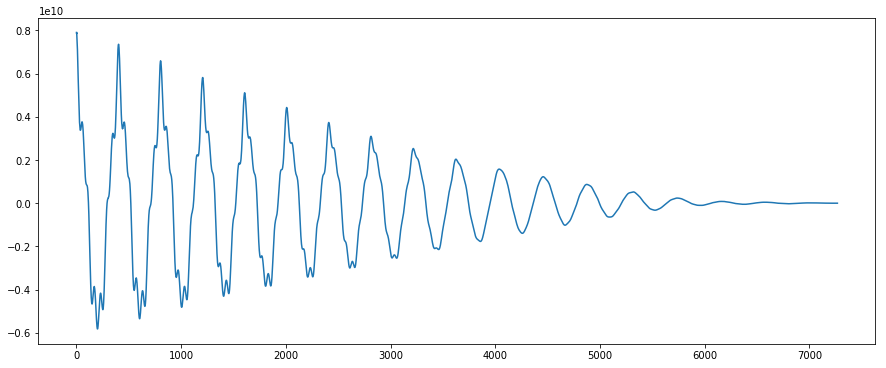

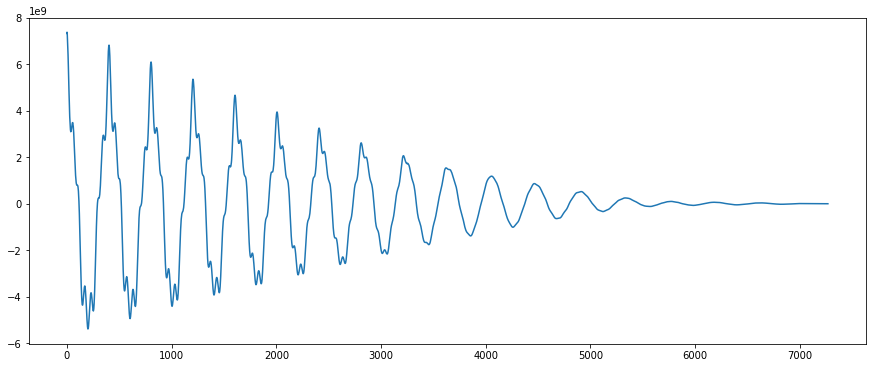

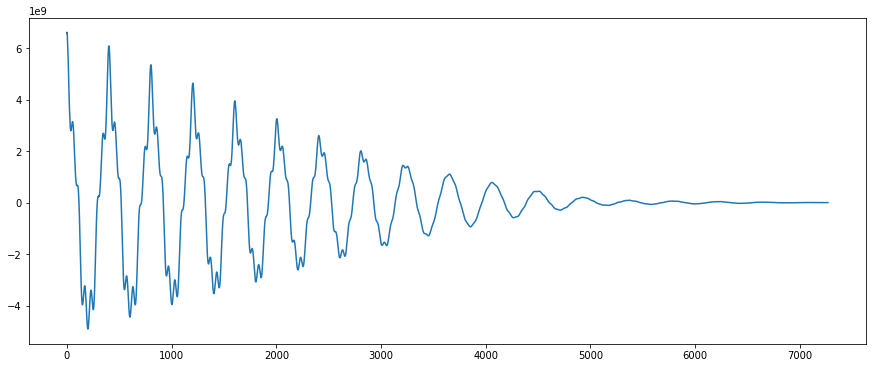

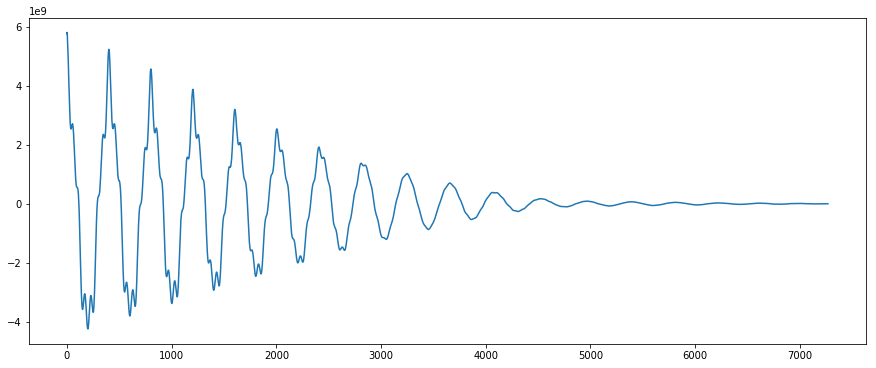

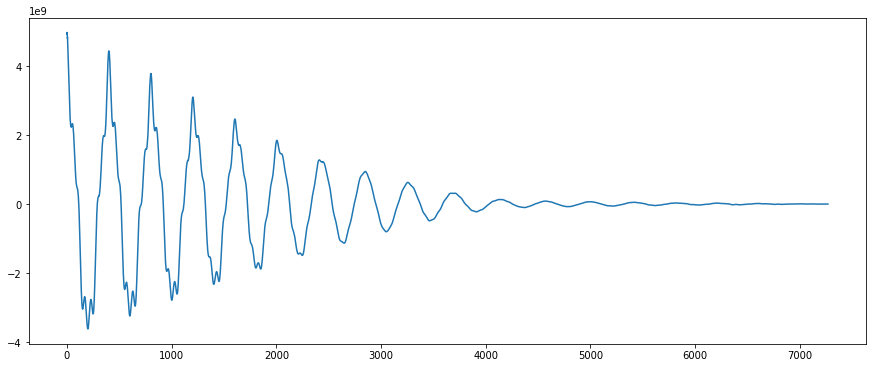

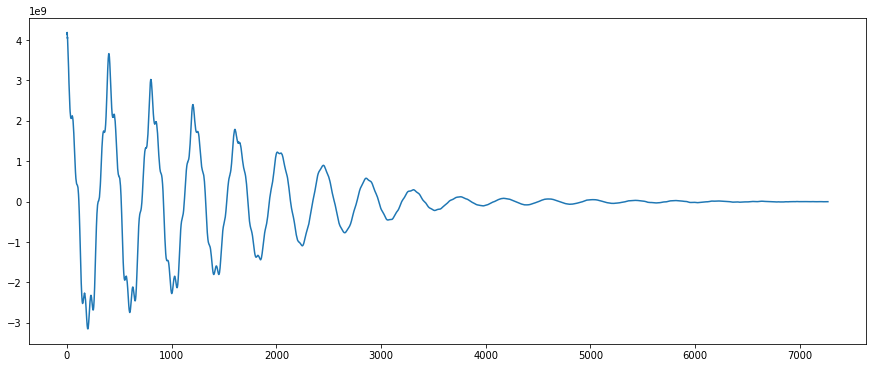

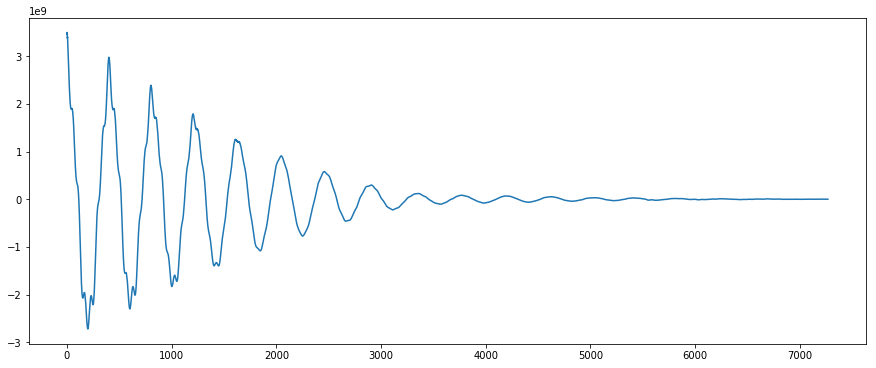

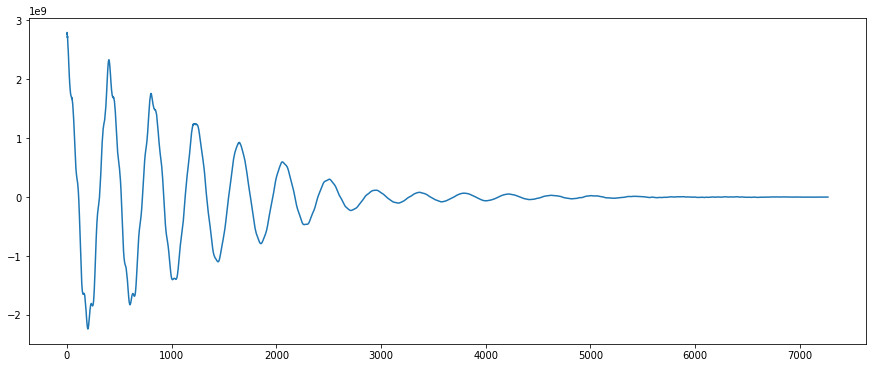

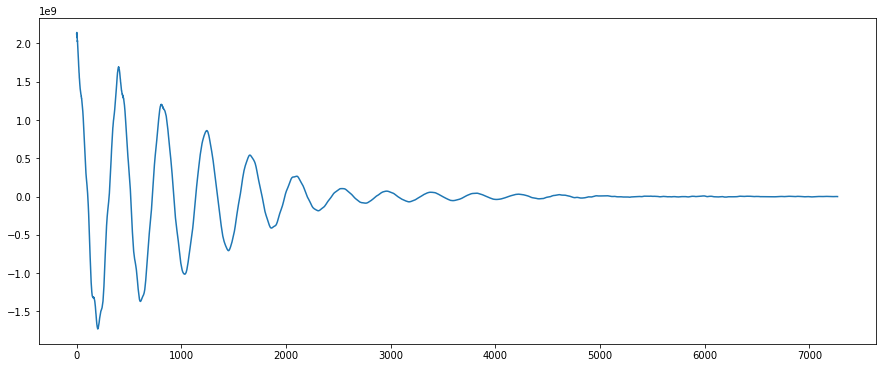

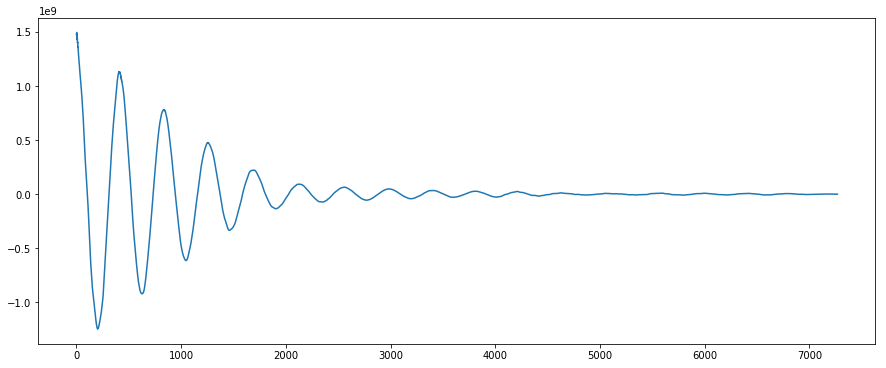

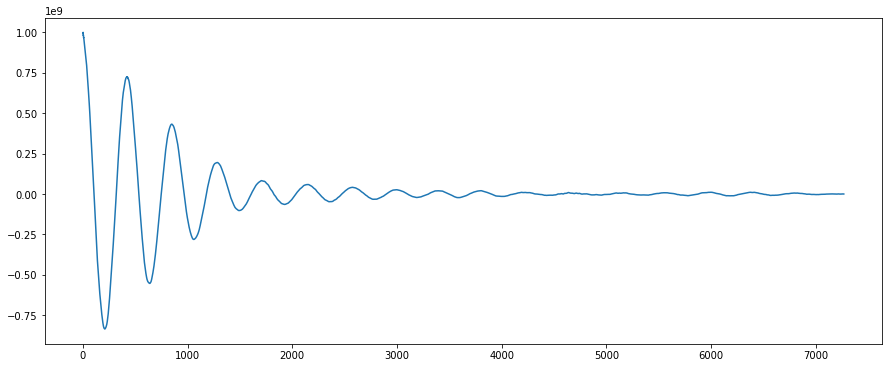

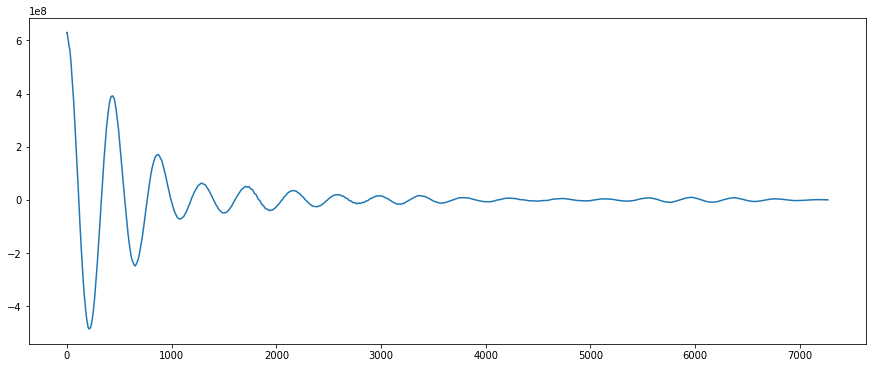

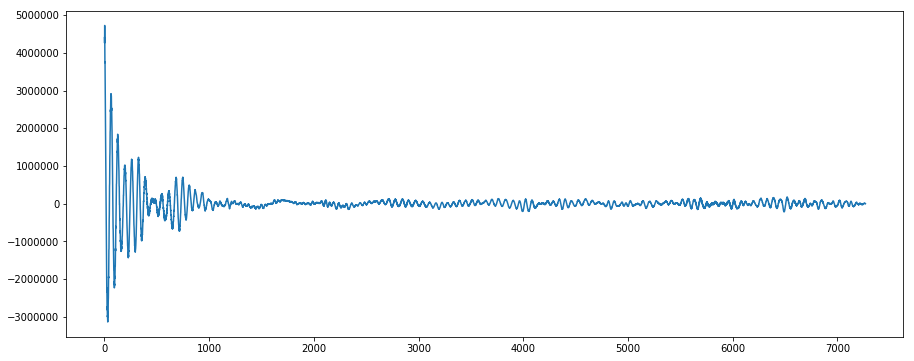

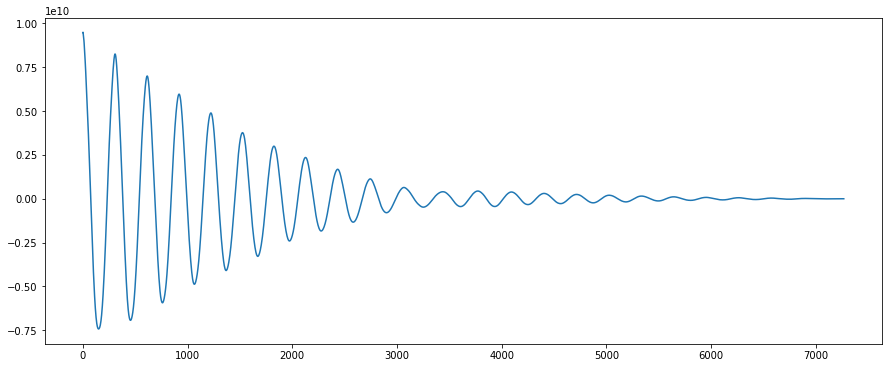

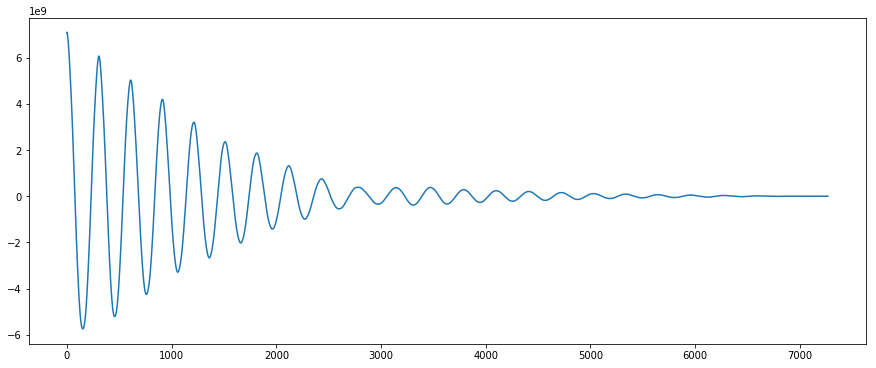

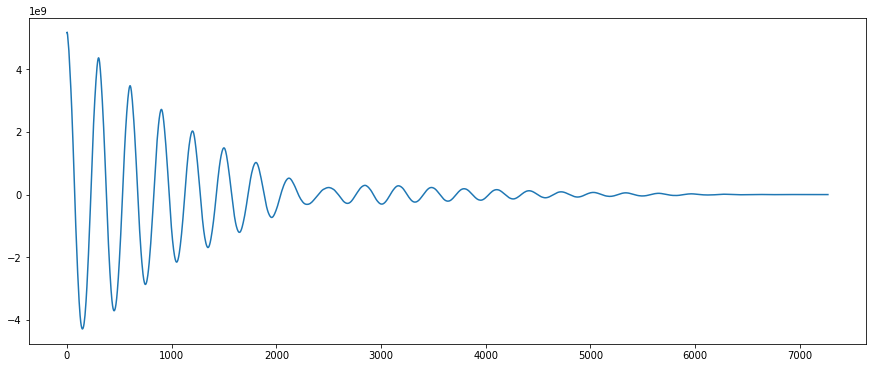

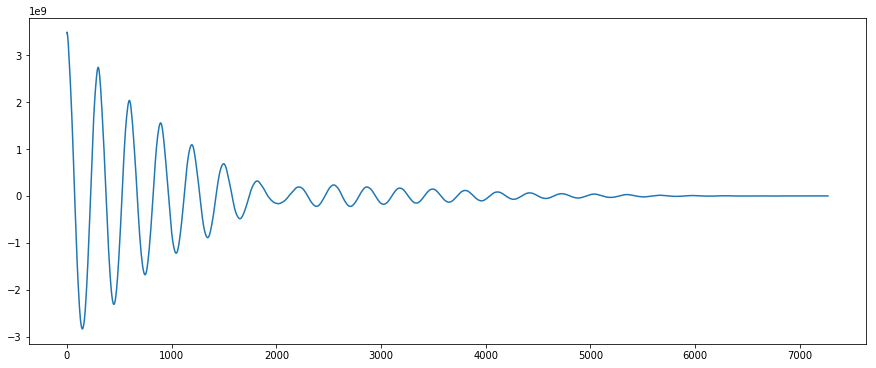

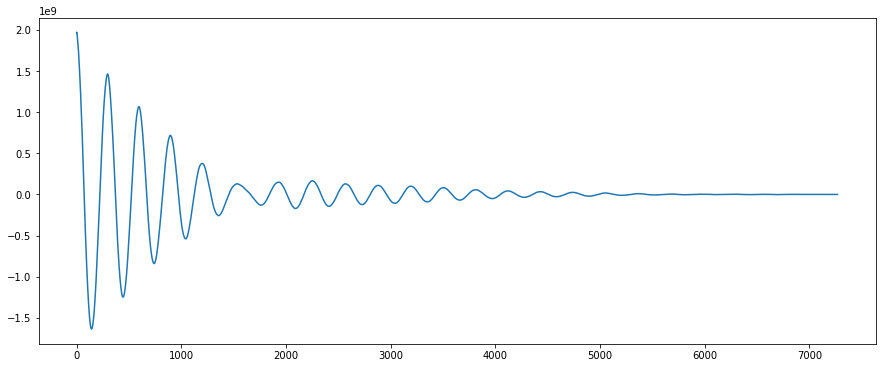

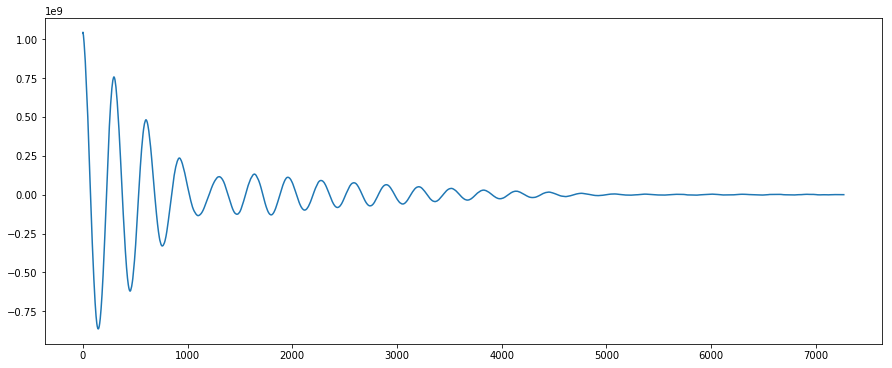

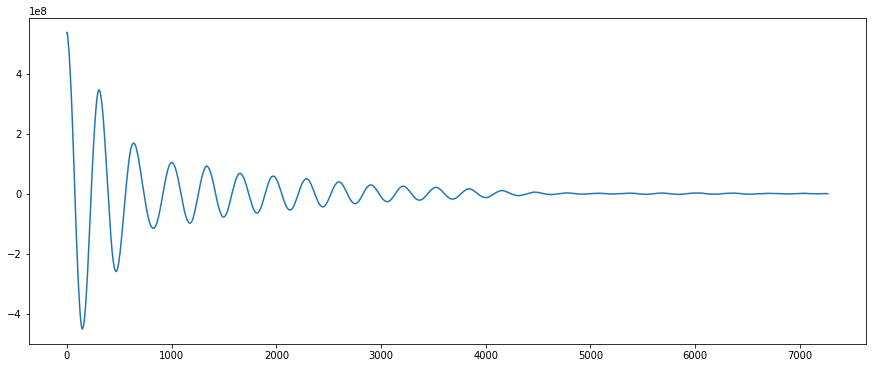

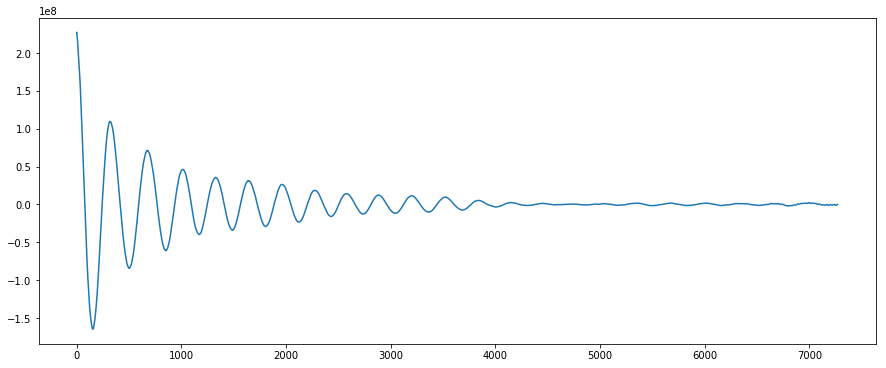

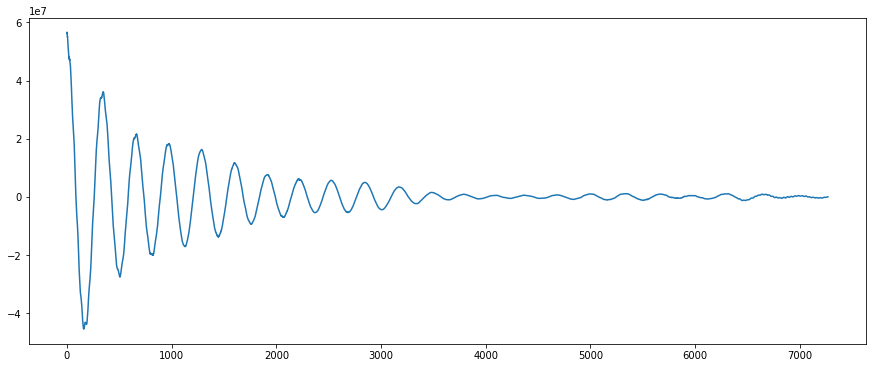

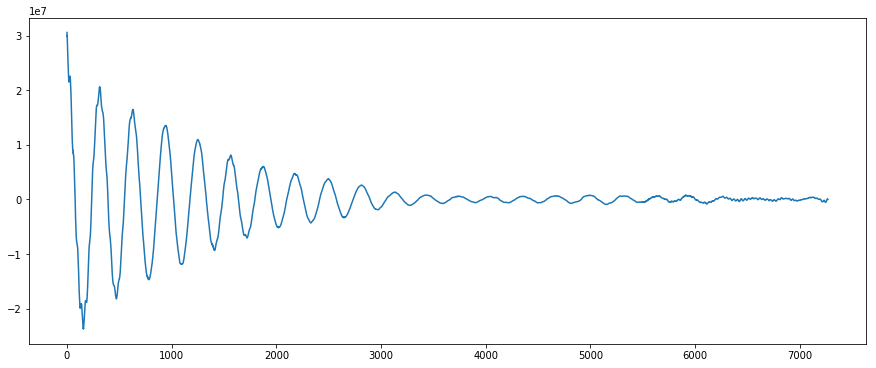

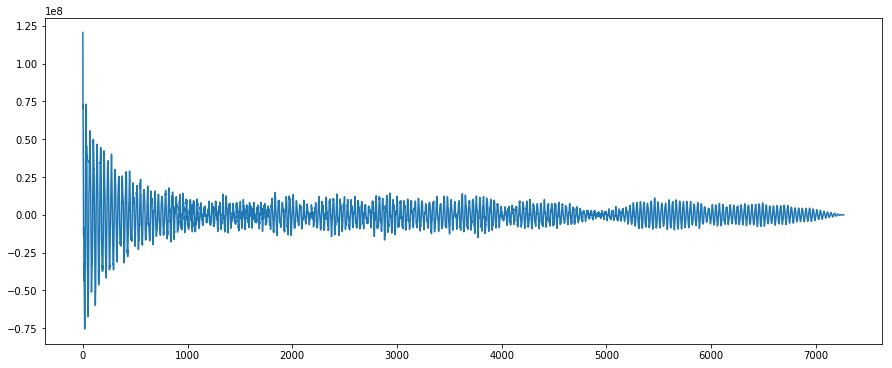

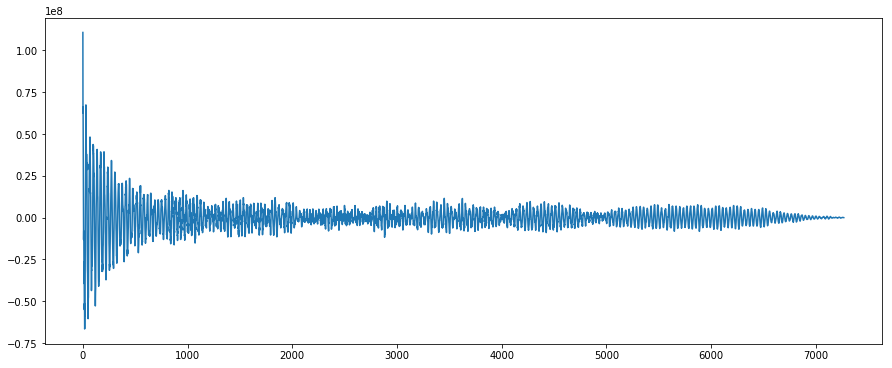

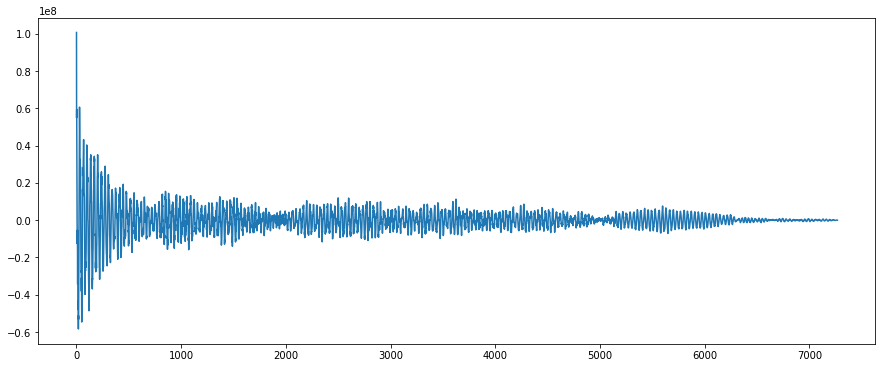

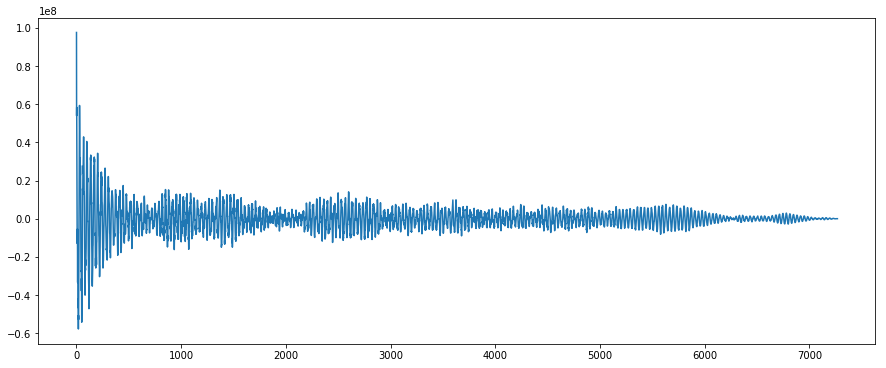

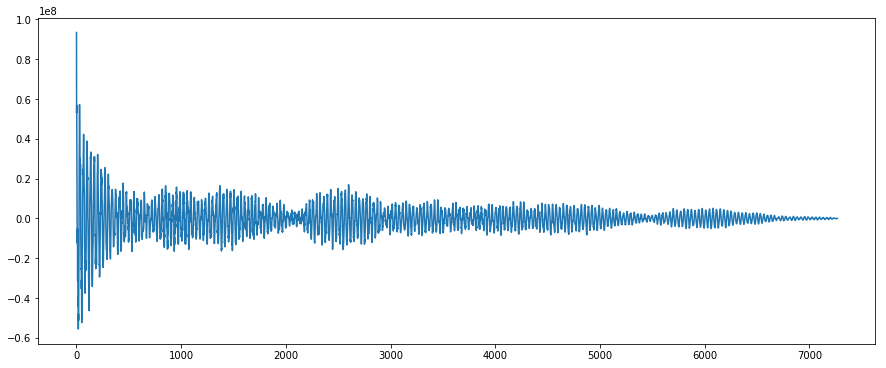

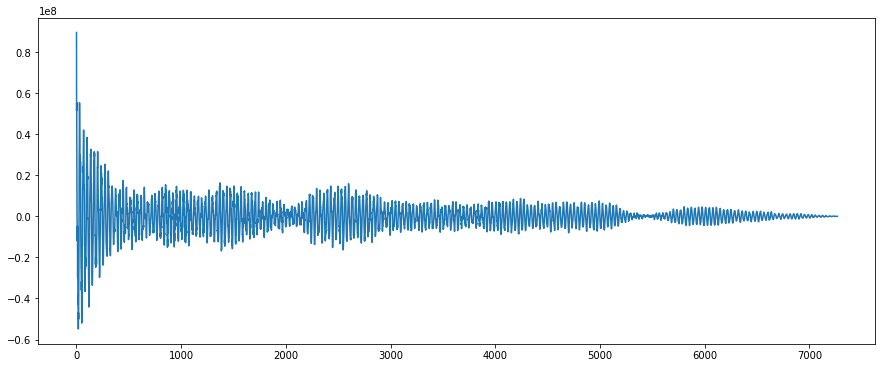

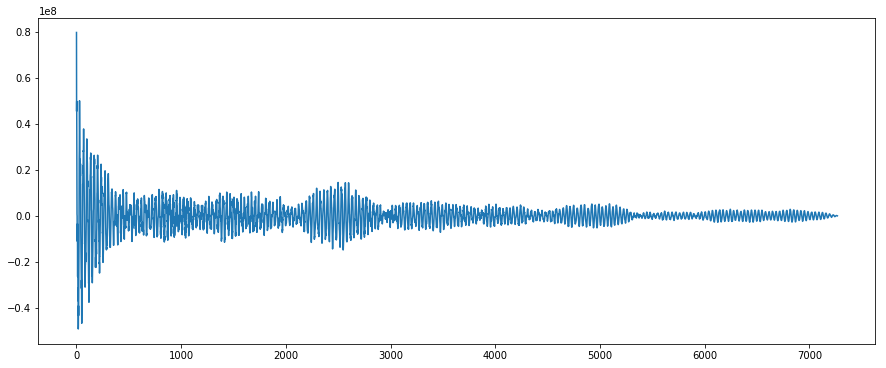

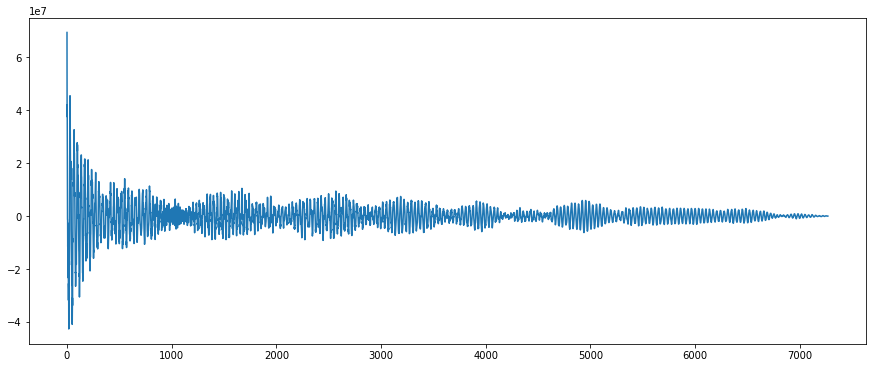

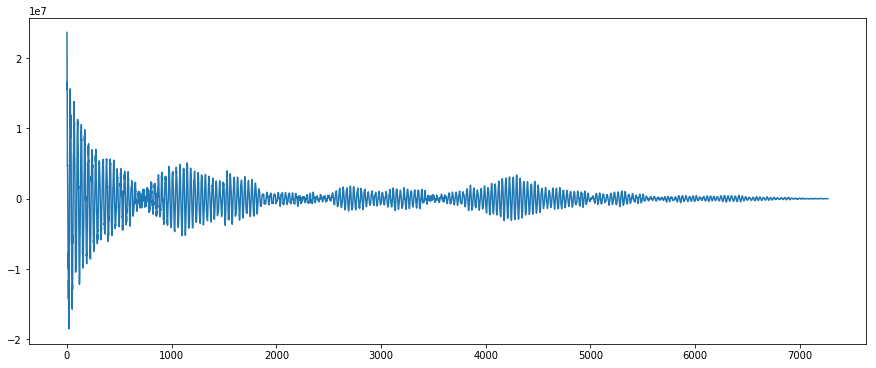

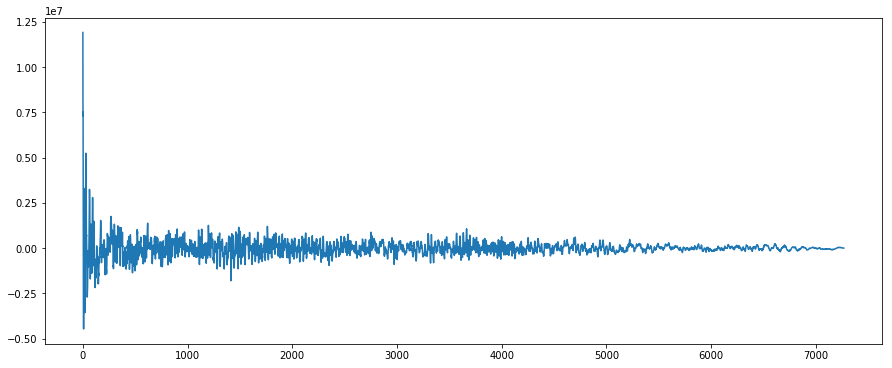

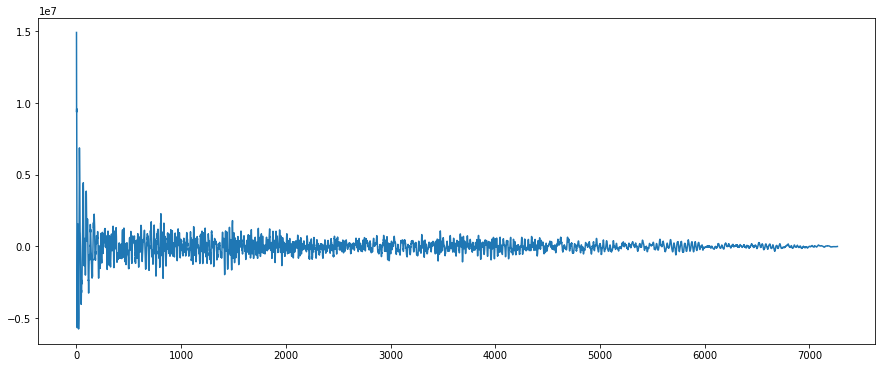

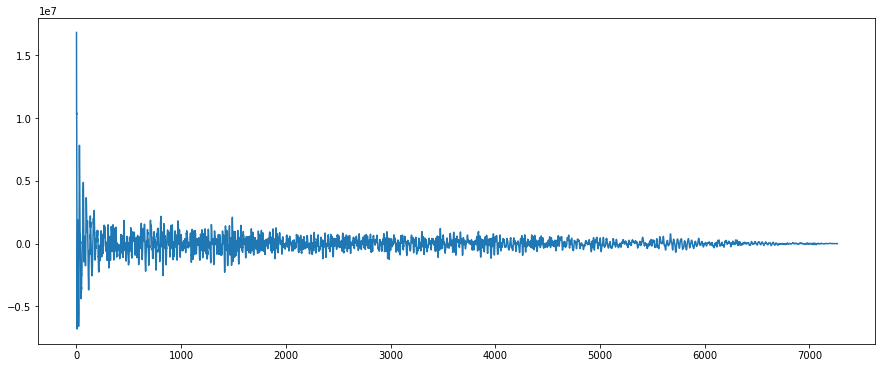

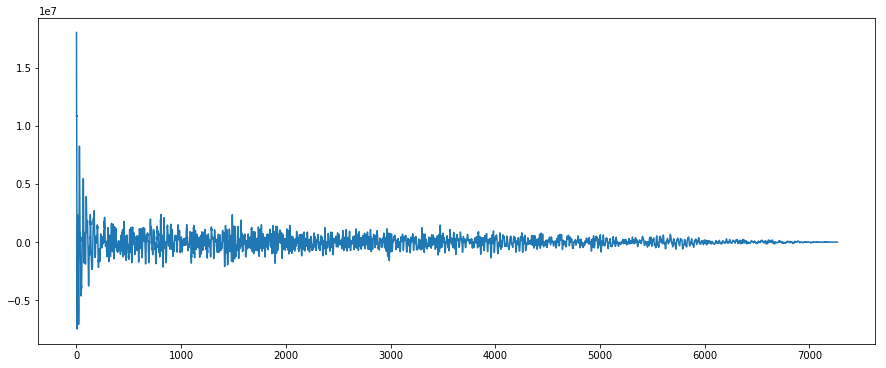

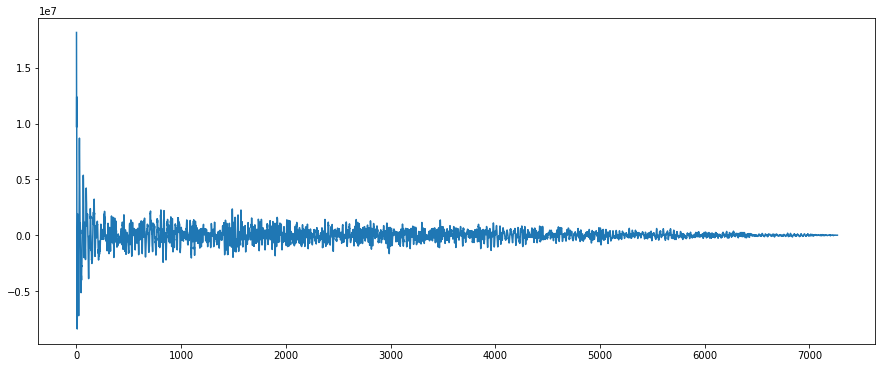

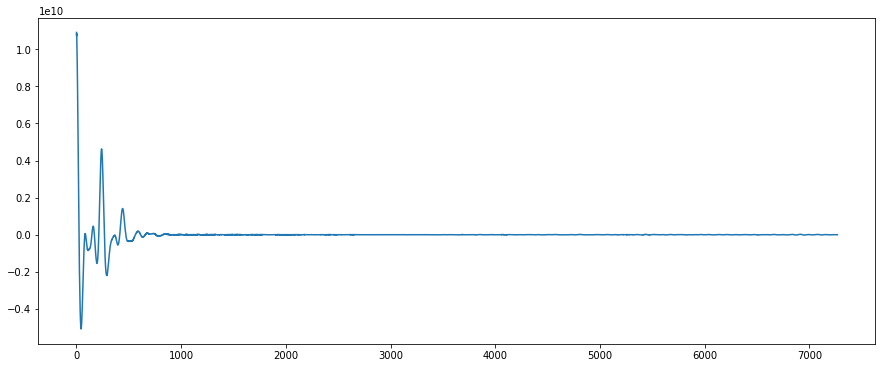

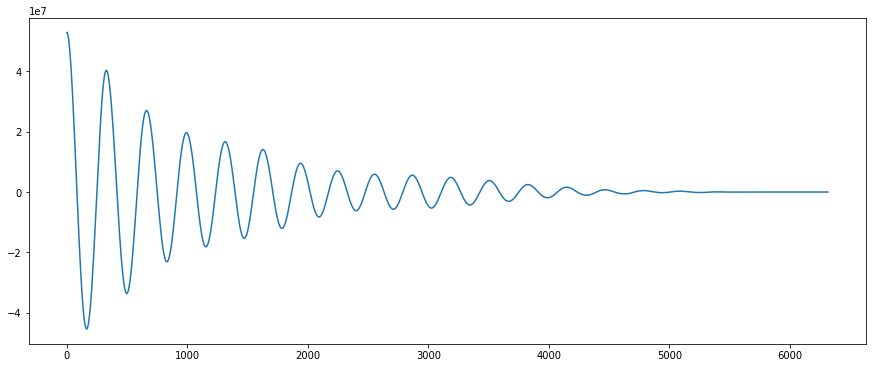

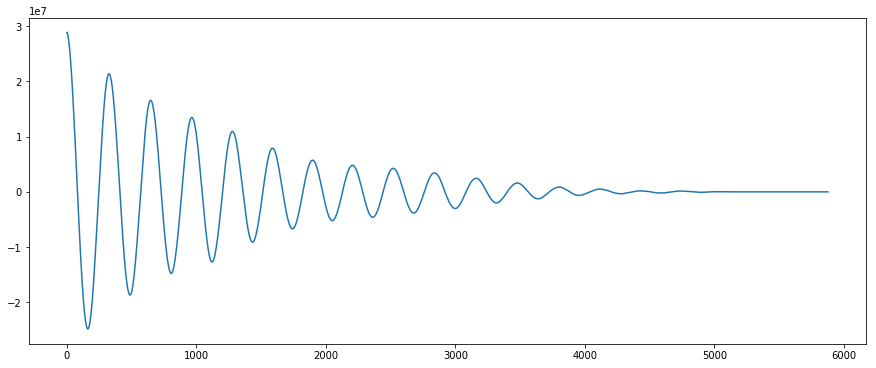

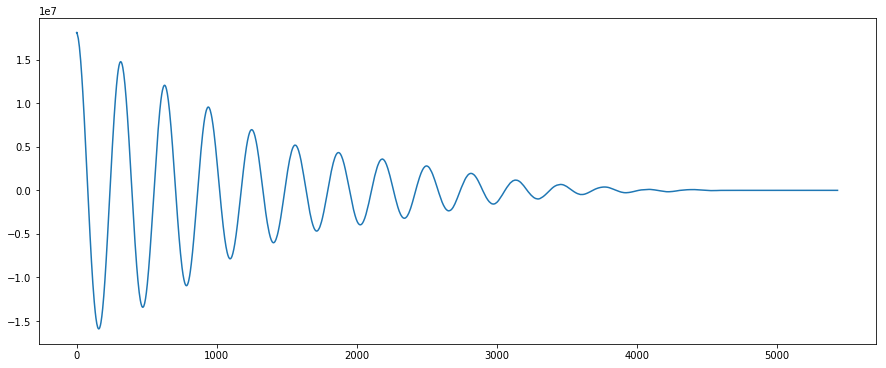

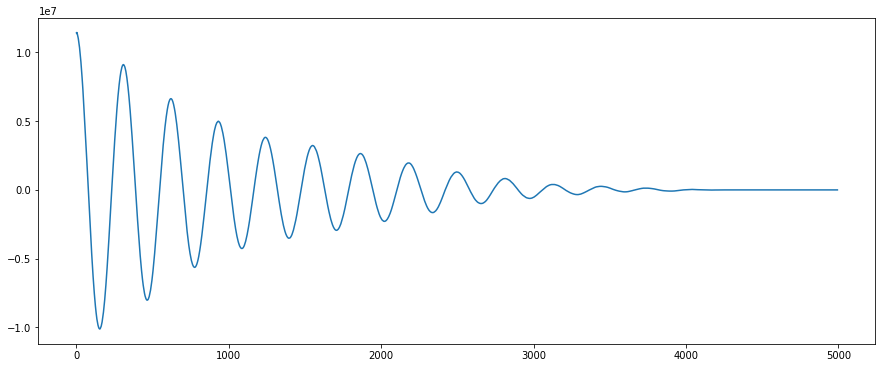

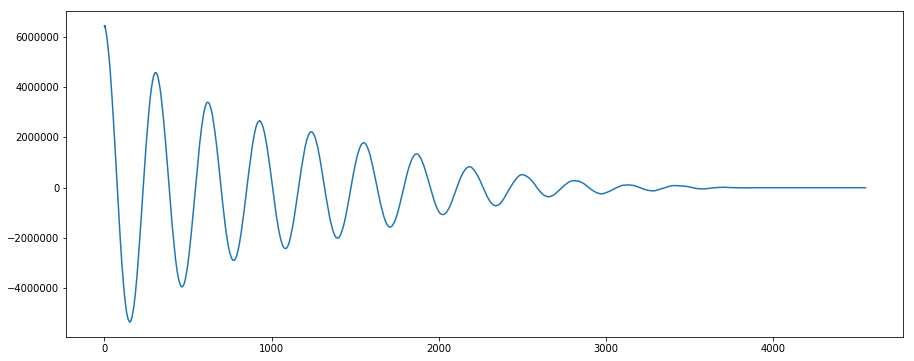

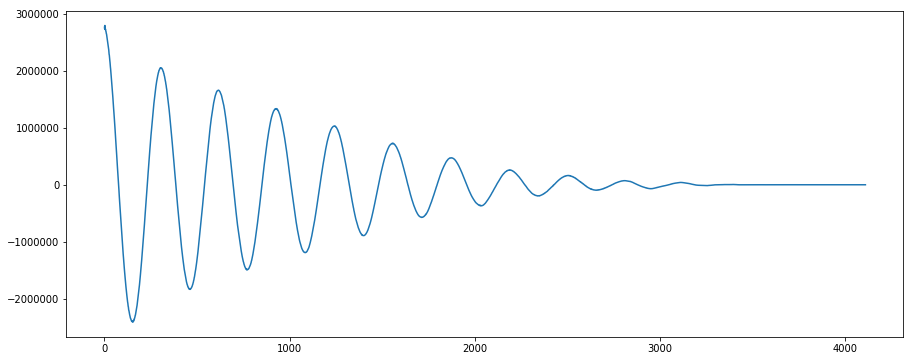

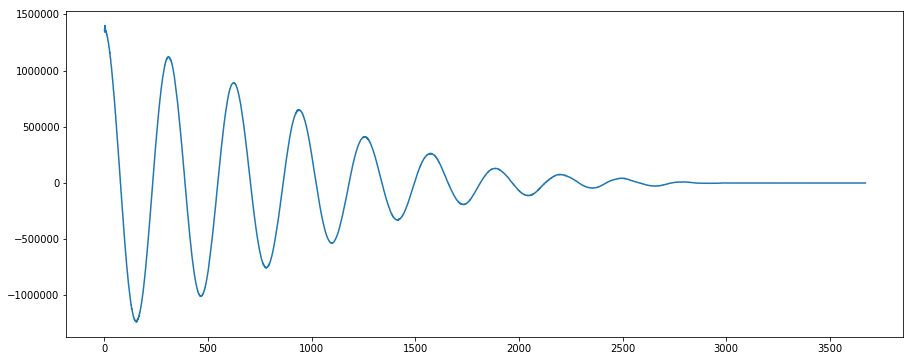

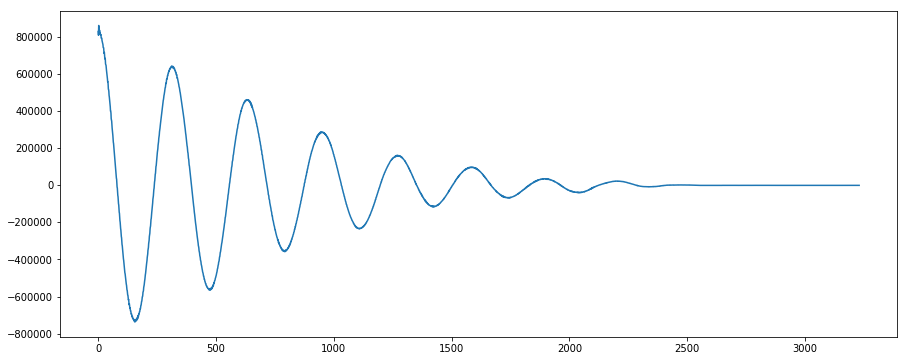

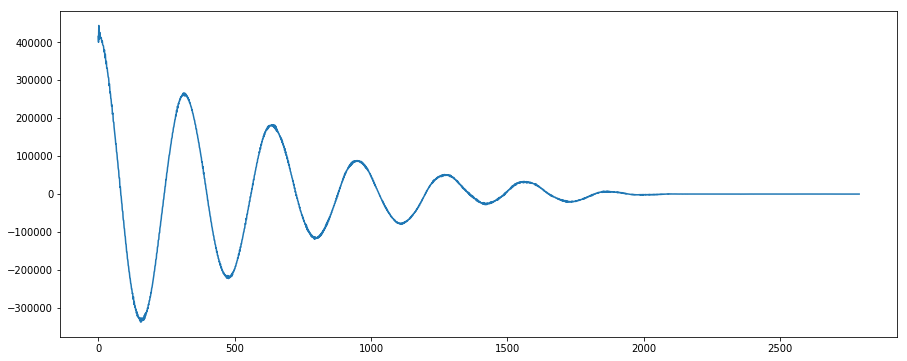

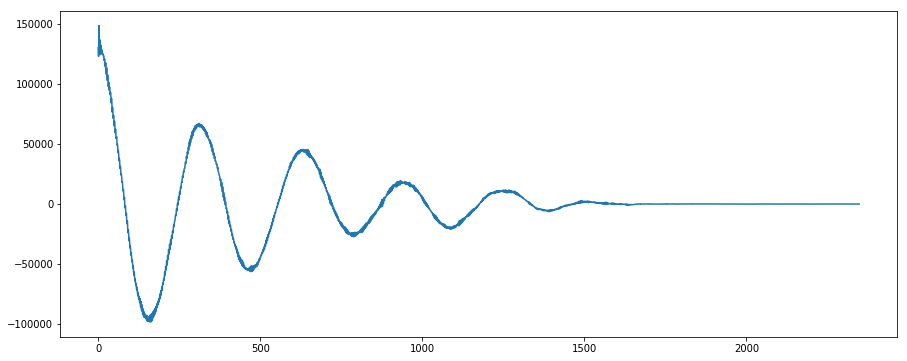

In [169]:
rate, wave = wav_read('katusha.wav')
length = wave.shape[0] / rate
res = []
for pos in np.arange(0, length - 1 / cnt, 1 / cnt):
    pitch = get_pitch(wave, int(pos * rate))
    det = determine(*pitch)
    # print(pitch, det)
    res.append(det)

In [170]:
len(res)

1649

In [171]:
from scipy.signal import spectrogram

In [213]:
def show_results(wave, rate, predict):
    predict = np.asanyarray(predict)
    wave = np.asanyarray(wave)
    fs, ts, sxx = spectrogram(wave, rate, nperseg=4096 * 2, noverlap=4096 * 2 * 7 // 8)
    plt.figure(figsize=(15, 6))
    plt.pcolormesh(ts, fs[:256], np.log(sxx[:256, :]))
    plt.plot(np.arange(0, len(predict) / cnt, 1 / cnt), 440 * 2 ** (predict / 12), color='black')
    plt.ylim(0, 4096 / 4)

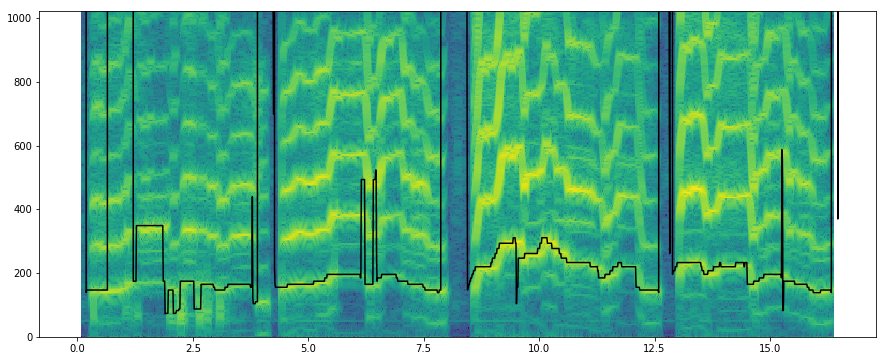

In [214]:
show_results(wave, rate, res)